In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import time 
import warnings 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings("ignore")

/kaggle/input/ukrainian-market-mobile-phones-data/phones_data.csv


In [2]:
mobiles = pd.read_csv('../input/ukrainian-market-mobile-phones-data/phones_data.csv', index_col=0)

In [3]:
print(f"There are {mobiles.shape[0]} rows and {mobiles.shape[1]} columns.")
print(f"There are {mobiles.isna().sum().sum()} missing values which represents {round((mobiles.isna().sum().sum() / (mobiles.shape[0] * mobiles.shape[1])) * 100, 2)}% of the data.")
print(f"Columns : {mobiles.columns.tolist()}")

There are 1224 rows and 12 columns.
There are 841 missing values which represents 5.73% of the data.
Columns : ['brand_name', 'model_name', 'os', 'popularity', 'best_price', 'lowest_price', 'highest_price', 'sellers_amount', 'screen_size', 'memory_size', 'battery_size', 'release_date']


In [4]:
mobiles.head()

brand_name                                    model_name       os  \
0    ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)  Android   
1    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
2    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
3    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)  Android   
4      Nokia                           1.3 1/16GB Charcoal  Android   

   popularity  best_price  lowest_price  highest_price  sellers_amount  \
0         422      1690.0        1529.0         1819.0              36   
1         323      1803.0        1659.0         2489.0              36   
2         299      1803.0        1659.0         2489.0              36   
3         287      1803.0        1659.0         2489.0              36   
4        1047      1999.0           NaN            NaN              10   

   screen_size  memory_size  battery_size release_date  
0         5.00          8.0        2000.0      10-2020  
1         5.00         16.0        2000.0       9-2020  
2         5.00         16.0        2000.0       9-2020  
3         5.00         16.0        2000.0       9-2020  
4         5.71         16.0        3000.0       4-2020

In [5]:
mobiles.describe()

popularity    best_price  lowest_price  highest_price  sellers_amount  \
count  1224.000000   1224.000000    964.000000     964.000000     1224.000000   
mean    612.500000   7941.206699   7716.018672    9883.410788       16.743464   
std     353.482673   8891.836260   8560.959059   11514.936818       20.597006   
min       1.000000    214.000000    198.000000     229.000000        1.000000   
25%     306.750000   2599.750000   2399.000000    2887.000000        2.000000   
50%     612.500000   4728.000000   4574.000000    5325.500000        8.000000   
75%     918.250000   9323.000000   9262.250000   12673.750000       26.000000   
max    1224.000000  56082.000000  49999.000000   69999.000000      125.000000   

       screen_size  memory_size  battery_size  
count  1222.000000  1112.000000   1214.000000  
mean      5.394378    95.700059   3608.201812  
std       1.476991   111.922576   1668.268774  
min       1.400000     0.003200    460.000000  
25%       5.162500    32.000000   2900.000000  
50%       6.000000    64.000000   3687.000000  
75%       6.400000   128.000000   4400.000000  
max       8.100000  1000.000000  18800.000000

In [6]:
mobiles.describe(include=['object'])

brand_name                                      model_name       os  \
count        1224                                            1224     1027   
unique         64                                            1068        6   
top       Samsung  Galaxy S9 SM-G960 DS 128GB Black (SM-G960FZKG)  Android   
freq          168                                               3      915   

       release_date  
count          1224  
unique           73  
top         10-2020  
freq             79

In [7]:
((mobiles.isna().sum()[mobiles.isna().sum()  > 0 ] / mobiles.shape[0] * 100).apply(lambda x: round(x, 1))).astype(str) + '%'

os               16.1%
lowest_price     21.2%
highest_price    21.2%
screen_size       0.2%
memory_size       9.2%
battery_size      0.8%
dtype: object

In [8]:
mobiles_names = mobiles['model_name']
mobiles       = mobiles.drop(columns=['model_name'])

mobiles['release_date'] = pd.to_datetime(mobiles['release_date'])

In [9]:
mobiles.head()

brand_name       os  popularity  best_price  lowest_price  highest_price  \
0    ALCATEL  Android         422      1690.0        1529.0         1819.0   
1    ALCATEL  Android         323      1803.0        1659.0         2489.0   
2    ALCATEL  Android         299      1803.0        1659.0         2489.0   
3    ALCATEL  Android         287      1803.0        1659.0         2489.0   
4      Nokia  Android        1047      1999.0           NaN            NaN   

   sellers_amount  screen_size  memory_size  battery_size release_date  
0              36         5.00          8.0        2000.0   2020-10-01  
1              36         5.00         16.0        2000.0   2020-09-01  
2              36         5.00         16.0        2000.0   2020-09-01  
3              36         5.00         16.0        2000.0   2020-09-01  
4              10         5.71         16.0        3000.0   2020-04-01

In [10]:
numericals   = mobiles.dtypes[(mobiles.dtypes!='O') & (mobiles.dtypes!='<M8[ns]')].index.tolist()

categoricals = mobiles.dtypes[mobiles.dtypes == 'O'].index.tolist()

In [11]:
WIDTH  = 20
HEIGHT = 8

In [12]:
def plot_numerical(frame, column, categorical=None, ax=None, n_row=None, n_col=None):
    if categorical is None:
        sns.histplot(data=frame, x=column, ax=ax[n_row][n_col])
    
    else:
        sns.histplot(data=frame, x=column, hue=categorical, ax=ax[n_row][n_col], legend=False)

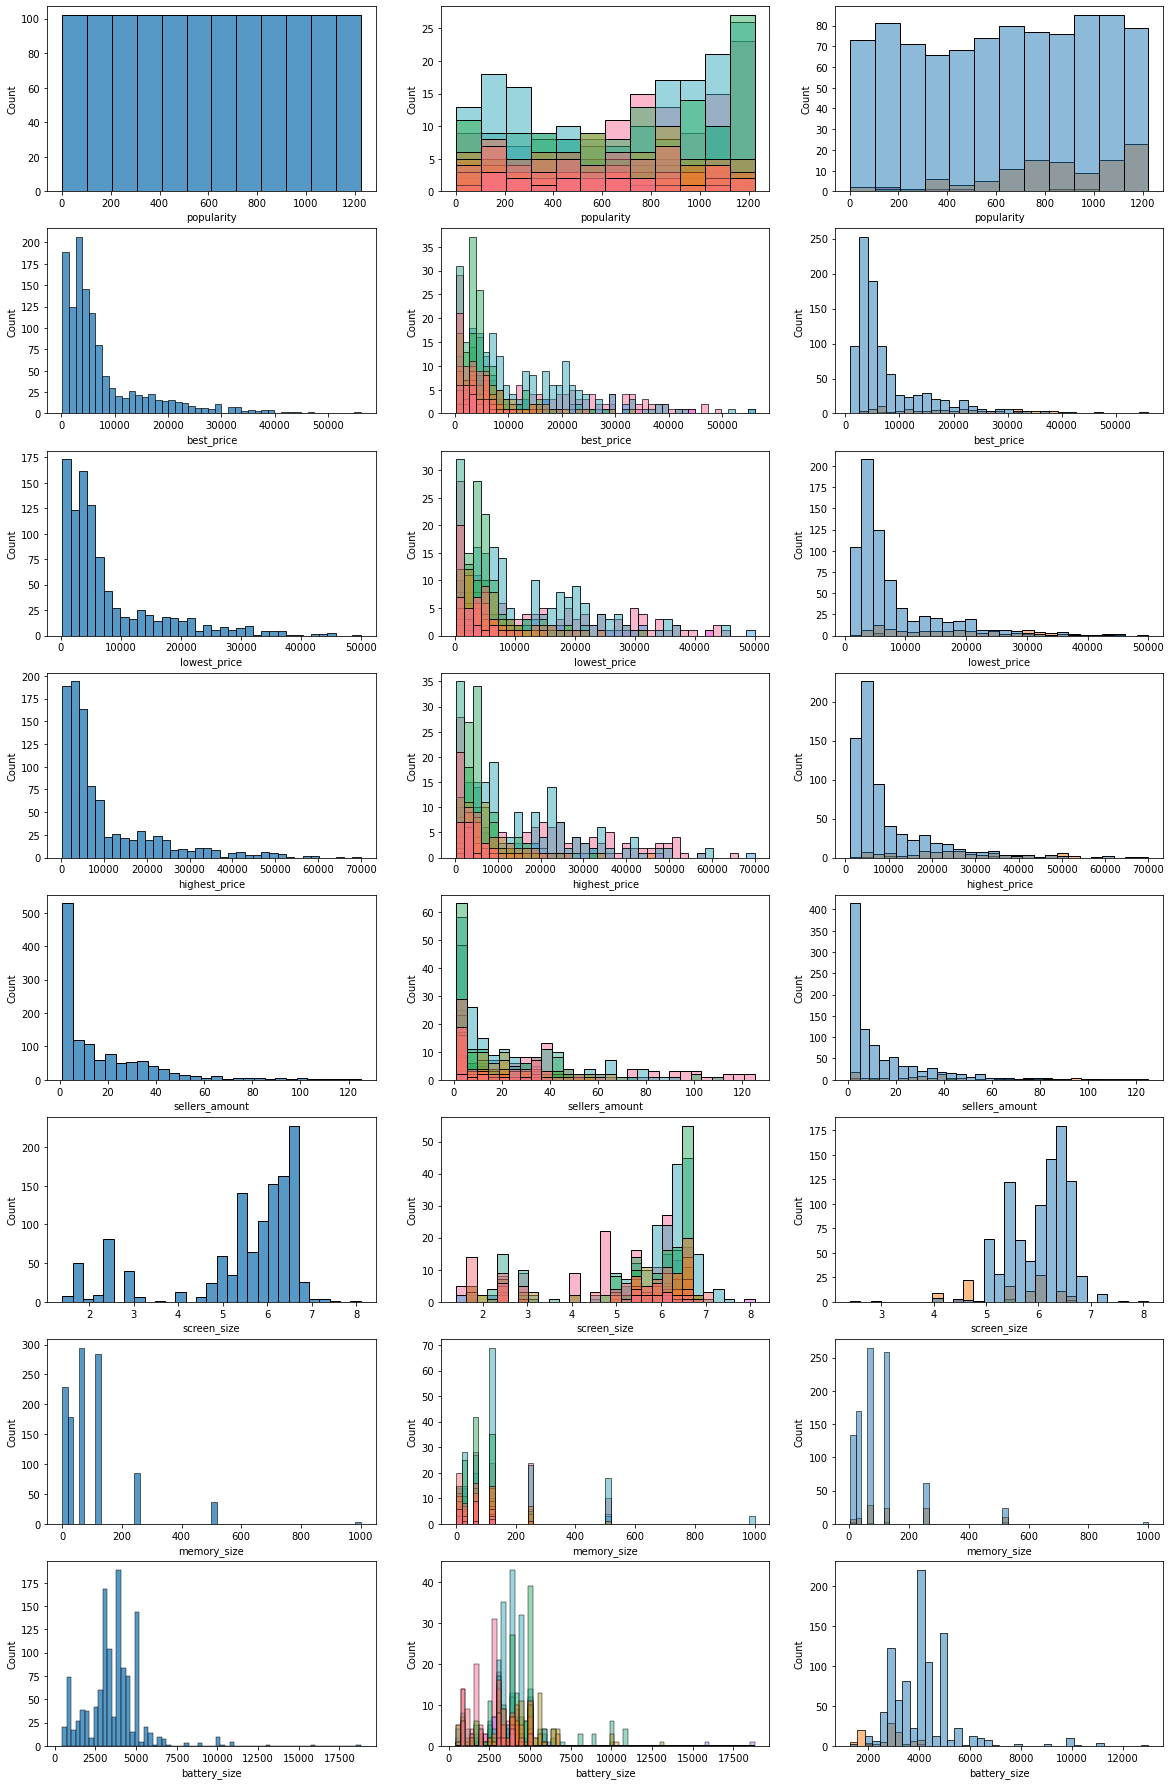

In [13]:
n_row = -1

fig, ax = plt.subplots(len(numericals), 1 + len(categoricals), figsize=(WIDTH, HEIGHT * (2 + len(categoricals))))

for numerical in numericals:
    n_col = 0
    n_row += 1
    
    plot_numerical(mobiles, numerical, categorical=None, ax=ax, n_row=n_row, n_col=n_col)
    n_col += 1
    
    for categorical in categoricals:
        plot_numerical(mobiles, numerical, categorical=categorical, ax=ax, n_row=n_row, n_col=n_col)
        n_col += 1

plt.show()

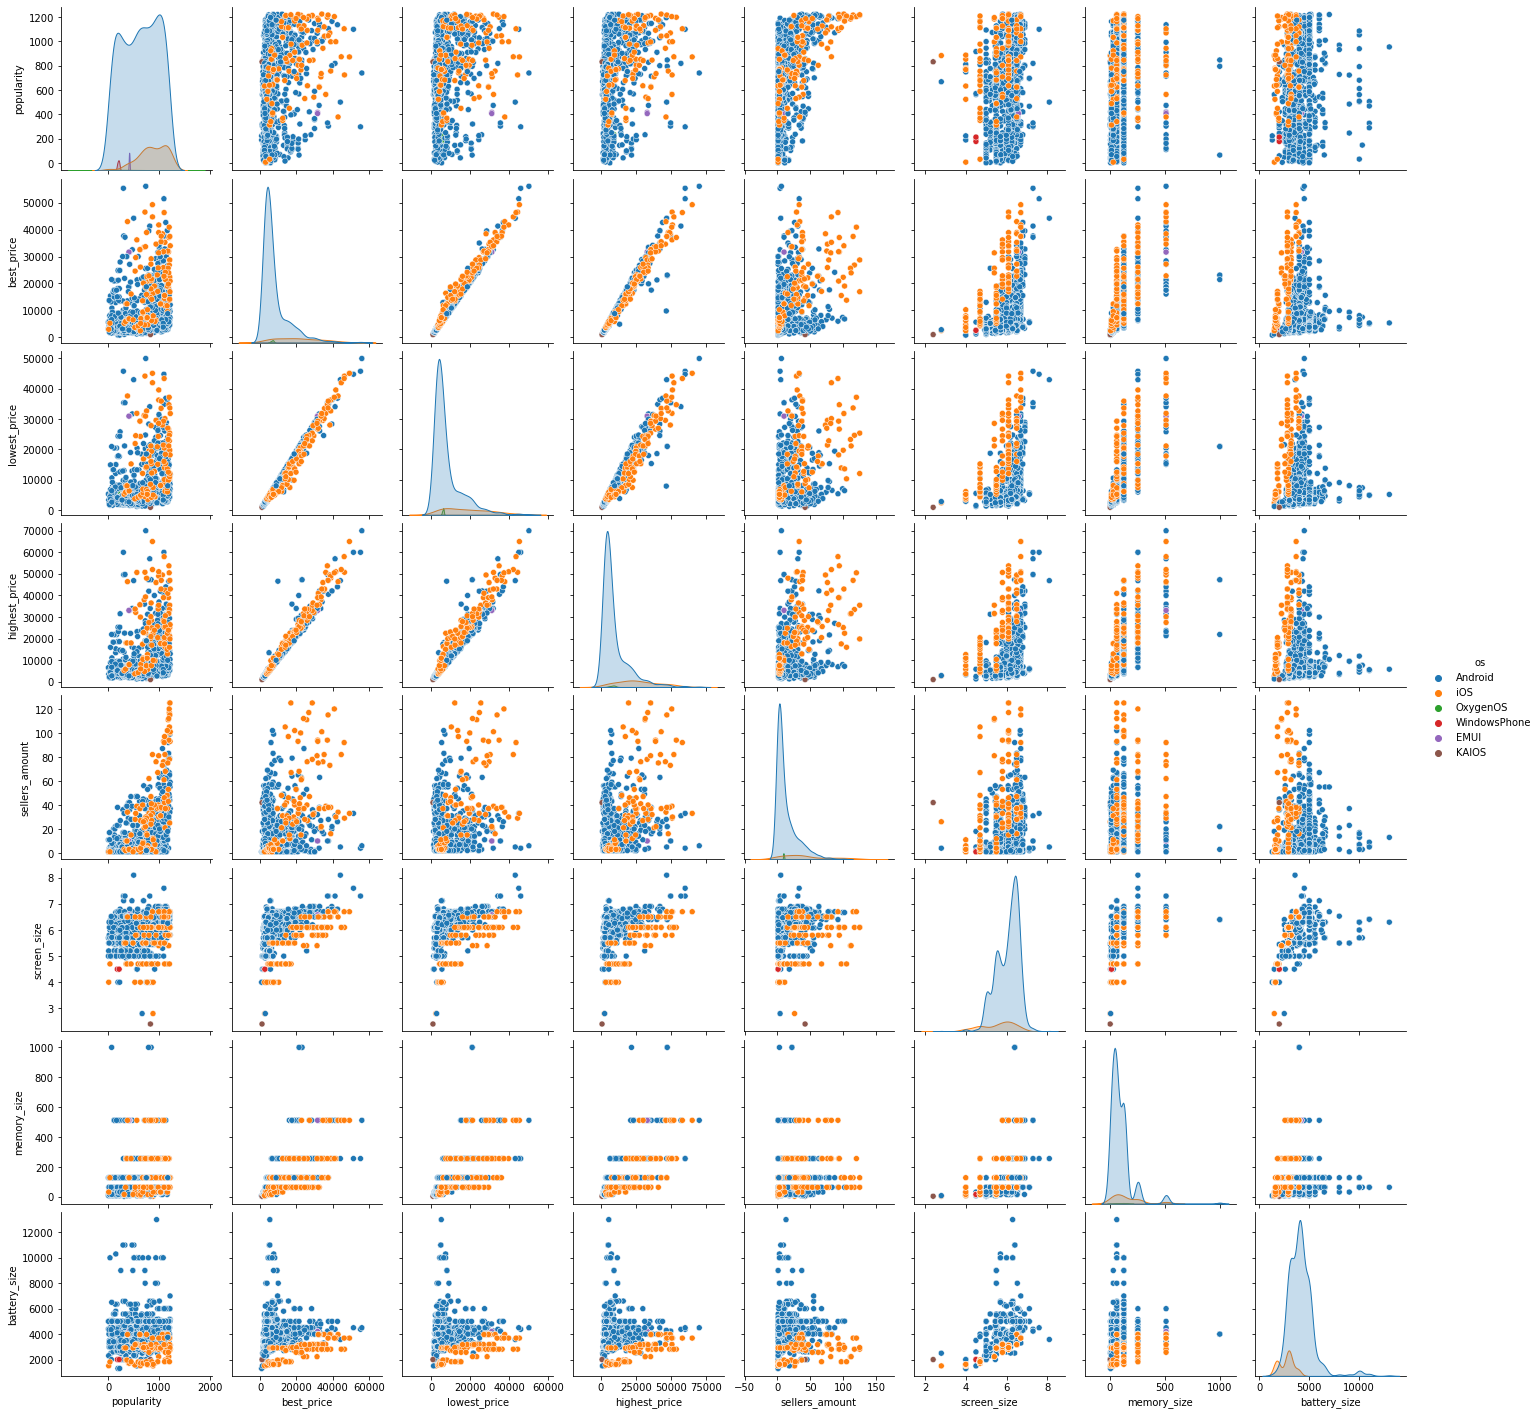

In [14]:
by_col = 'os'

sns.pairplot(mobiles[numericals + [by_col]], hue=by_col)
plt.show()

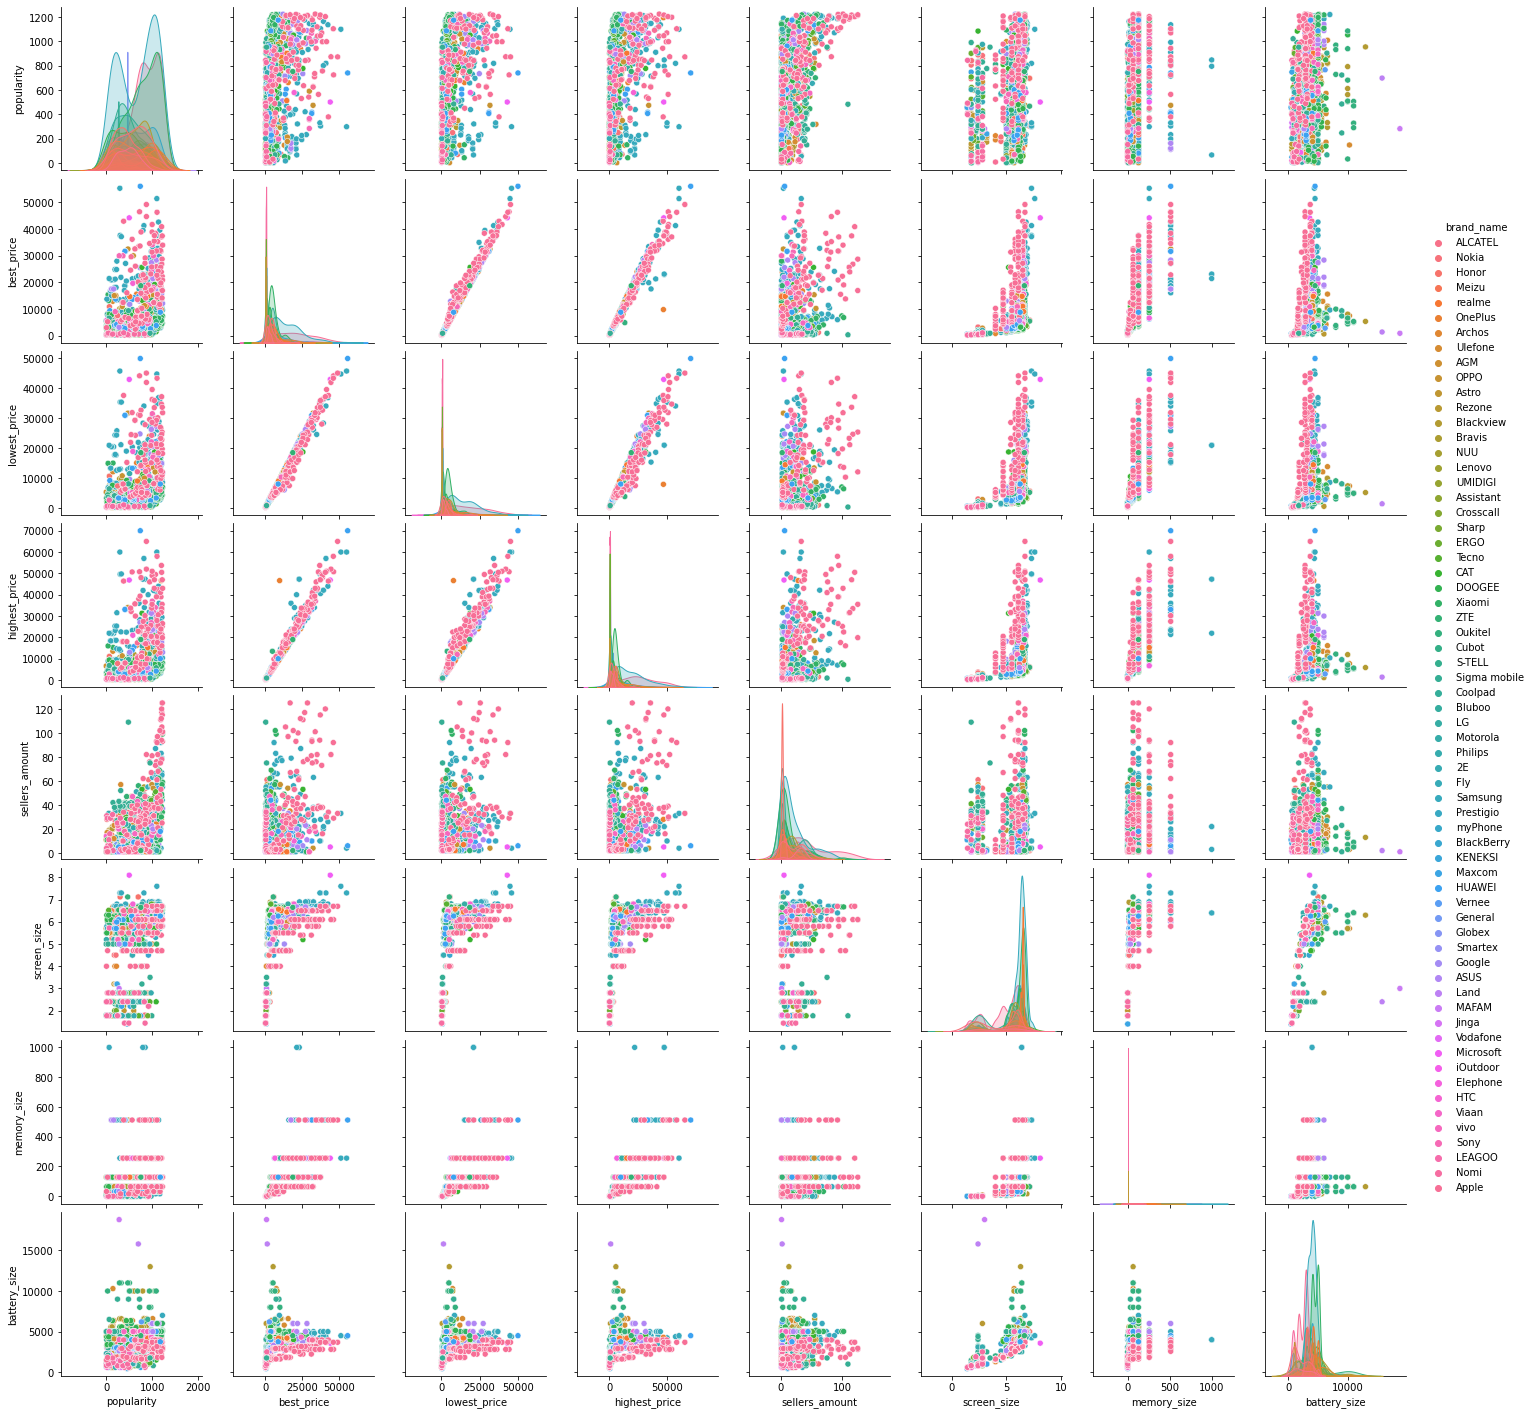

In [15]:
by_col = 'brand_name'

sns.pairplot(mobiles[numericals + [by_col]], hue=by_col)
plt.show()

In [16]:
def plot_categorical(frame, column):
    sns.countplot(frame[column])

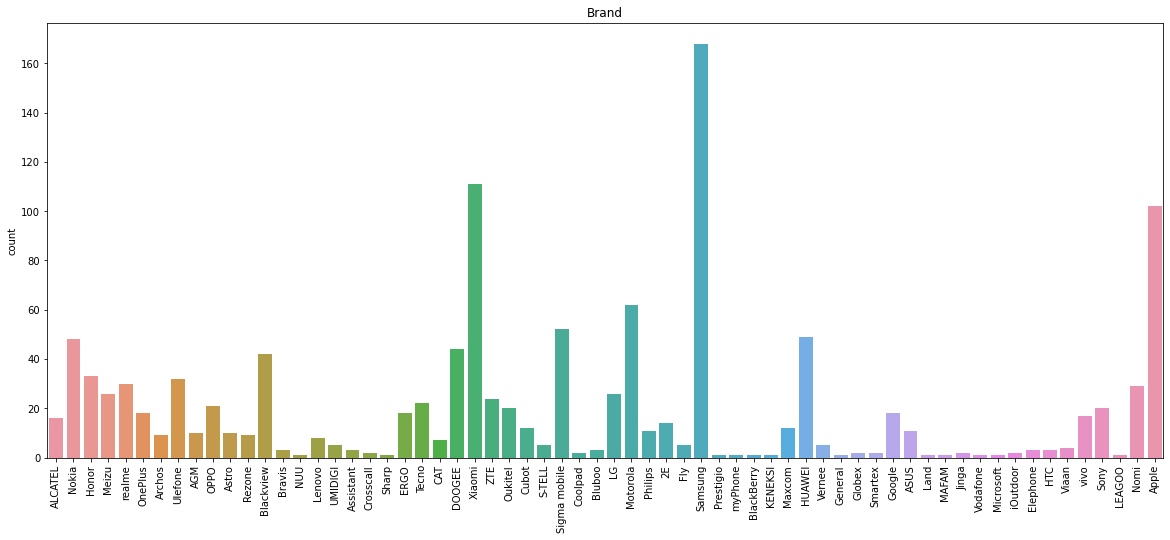

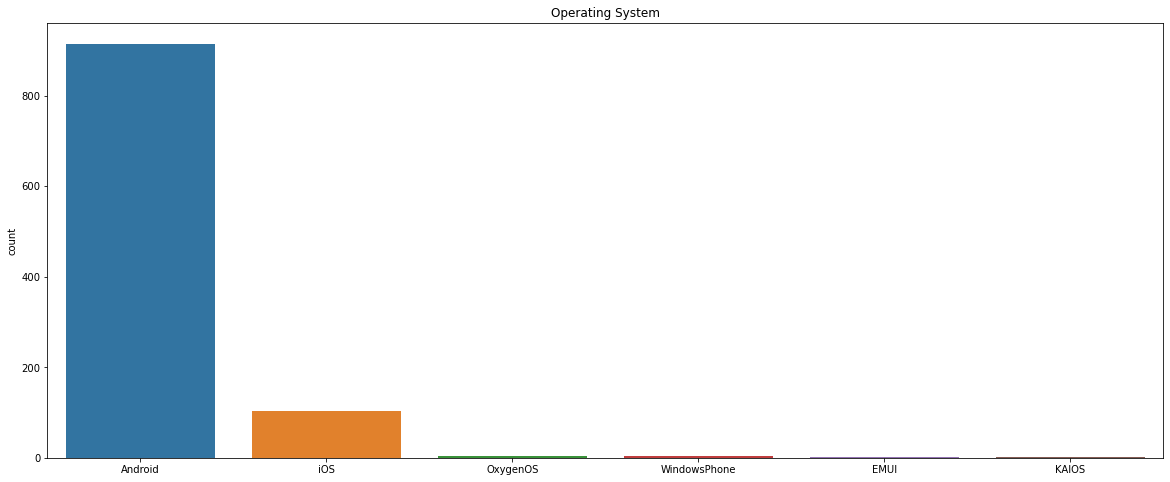

In [17]:
titles = ['Brand', 'Operating System']

for categorical, title in zip(categoricals, titles):
    plt.figure(figsize=(WIDTH, HEIGHT))
    plot_categorical(mobiles, categorical)
    plt.title(title)
    
    if title == 'Brand':
        plt.xticks(rotation=90)

    plt.xlabel('')
    plt.show()

In [18]:
earliest = mobiles['release_date'].min().strftime("%B %d, %Y")
latest   = mobiles['release_date'].max().strftime("%B %d, %Y")

print(f"Release dates are between {earliest} and {latest}")

Release dates are between January 01, 2013 and February 01, 2021


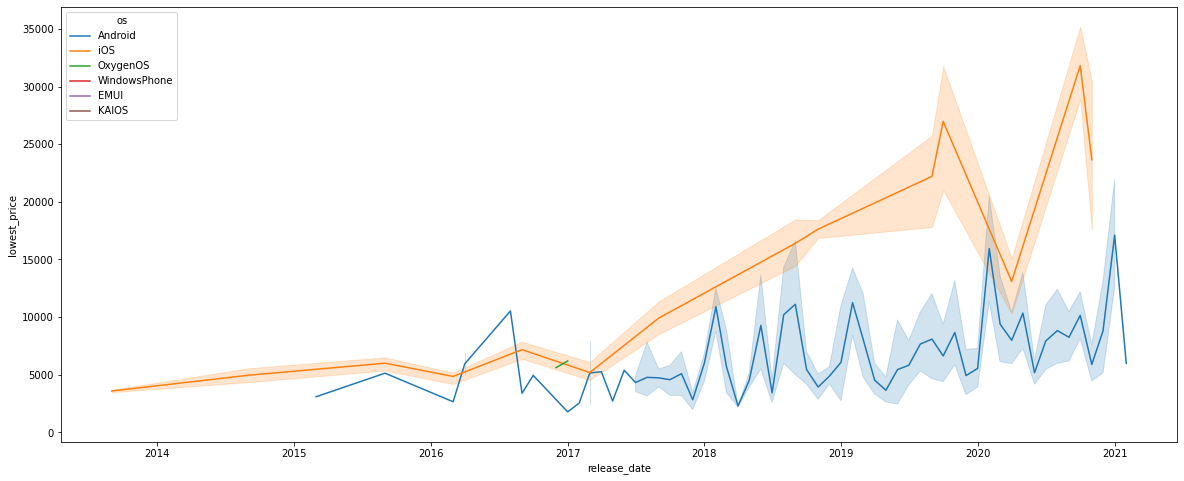

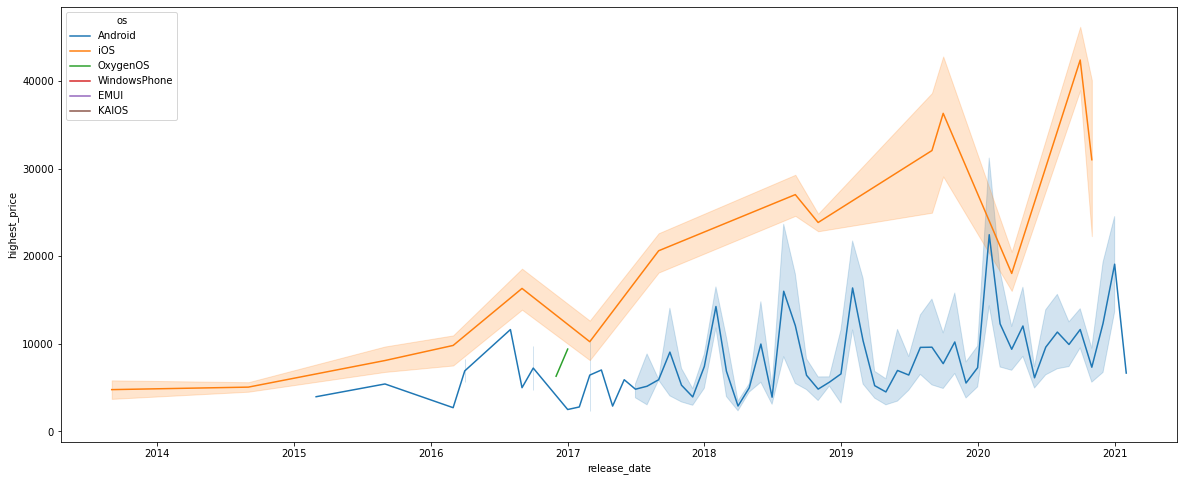

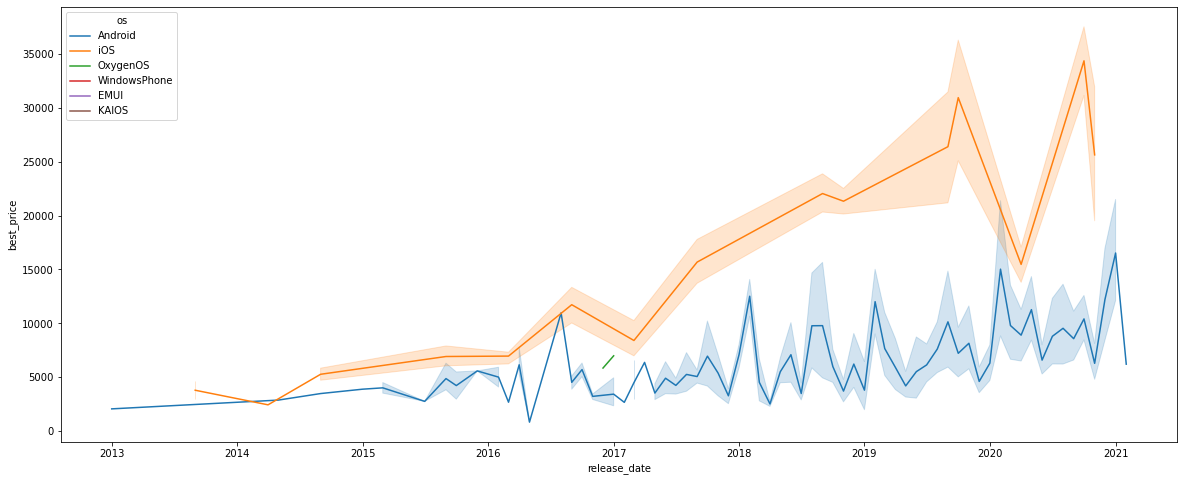

In [19]:
for price in [ f"{e}_price" for e in ['lowest', 'highest', 'best']]:
    plt.figure(figsize=(WIDTH, HEIGHT))
    sns.lineplot(data=mobiles, x='release_date', y=price, hue='os')
    plt.show()

In [20]:
def print_phone(phone):
    space = 30
    print(f"{'Name'.rjust(space)} : {phone['model_name']}")
    print(f"{'Price'.rjust(space)} : [{phone['lowest_price']}; {phone['highest_price']}]")
    print(f"{'Popularity'.rjust(space)} : {phone['popularity']}")
    print(f"{'Brand (OS)'.rjust(space)} : {phone['brand_name']} ({phone['os']})")

In [21]:
for i in range(5):
    phone = mobiles.nlargest(5, 'highest_price').join(mobiles_names[mobiles.nlargest(5, 'highest_price').index]).iloc[i]
    print_phone(phone)
    print()

                          Name : Mate Xs 8/512GB Interstellar blue (51095CSQ)
                         Price : [49999.0; 69999.0]
                    Popularity : 740
                    Brand (OS) : HUAWEI (Android)

                          Name : iPhone 12 Pro Max 512GB Dual Sim Pacific Blue (MGCE3)
                         Price : [45120.0; 64999.0]
                    Popularity : 872
                    Brand (OS) : Apple (iOS)

                          Name : Galaxy Fold 12/256GB Black
                         Price : [45799.0; 59999.0]
                    Popularity : 298
                    Brand (OS) : Samsung (Android)

                          Name : Galaxy Z Fold2 12/256GB Mystic Black (SM-F916BZKQ)
                         Price : [44809.0; 59999.0]
                    Popularity : 1099
                    Brand (OS) : Samsung (Android)

                          Name : iPhone 12 Pro Max 512GB Pacific Blue (MGDL3)
                         Price : [43396.0; 57999.0]
   

In [22]:
for i in range(5):
    phone = mobiles.nsmallest(5, 'highest_price').join(mobiles_names[mobiles.nsmallest(5, 'highest_price').index]).iloc[i]
    print_phone(phone)
    print()

                          Name : A144 Black/Red
                         Price : [199.0; 229.0]
                    Popularity : 519
                    Brand (OS) : Astro (nan)

                          Name : i144m Black
                         Price : [209.0; 229.0]
                    Popularity : 492
                    Brand (OS) : Nomi (nan)

                          Name : V182 Black
                         Price : [239.0; 259.0]
                    Popularity : 19
                    Brand (OS) : Viaan (nan)

                          Name : F188 Play DS Black
                         Price : [227.0; 289.0]
                    Popularity : 333
                    Brand (OS) : ERGO (nan)

                          Name : F188 Play DS Black
                         Price : [227.0; 289.0]
                    Popularity : 294
                    Brand (OS) : ERGO (nan)



In [23]:
data = mobiles.copy()

features = [
    'brand_name',
    'os',
    'popularity',
    'sellers_amount',
    'screen_size',
    'memory_size',
    'battery_size',
]

nums  = ['popularity', 'sellers_amount', 'screen_size', 'memory_size', 'battery_size']
cats  = ['brand_name', 'os']

TARGET = 'best_price'

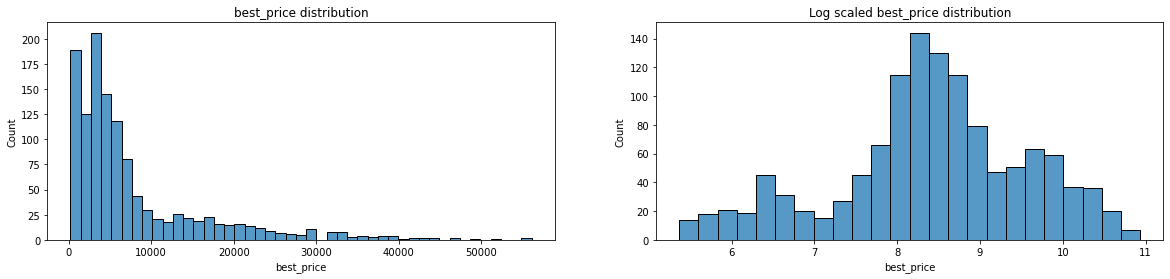

In [24]:
fig, ax= plt.subplots(1, 2, figsize=(WIDTH, HEIGHT/2))

sns.histplot(mobiles[TARGET], ax=ax[0])
ax[0].title.set_text(f'{TARGET} distribution')

sns.histplot(mobiles[TARGET].apply(np.log), ax=ax[1])
ax[1].title.set_text(f'Log scaled {TARGET} distribution')

plt.show()

In [25]:
data[TARGET] = data[TARGET].apply(np.log)

In [27]:
from sklearn.preprocessing import StandardScaler

# Init. the scaler
scaler = StandardScaler()

# Fitting the scaler to the data
scaled_data = scaler.fit_transform(data[nums])
data[nums]  = pd.DataFrame(columns=nums, data=scaled_data)

In [28]:
data[cats] = data[cats].fillna('Unknown')

In [29]:
fill_data  = data.groupby(cats, sort=False)[nums].apply(lambda x: x.ffill().bfill())

data.loc[fill_data.index, nums] = fill_data

In [30]:
print(f"There are {data[nums].isna().sum().sum()} missing values which represents {round((data[nums].isna().sum().sum() / (data[nums].shape[0] * data[nums].shape[1])) * 100, 2)}% of the data.")

There are 28 missing values which represents 0.46% of the data.


Because there is still missing data because the aggregation could not be done on all data, we will input the rest with the median.

In [31]:
data[nums] = data[nums].fillna(data[nums].median())

In [32]:
print(f"There are {data[nums].isna().sum().sum()} missing values which represents {round((data[nums].isna().sum().sum() / (data[nums].shape[0] * data[nums].shape[1])) * 100, 2)}% of the data.")

There are 0 missing values which represents 0.0% of the data.


In [33]:
oh_cats = pd.get_dummies(data[cats])

data = pd.concat([
    data.drop(columns=cats),
    oh_cats
], axis=1)

for cat in cats:
    if cat in features:
        features.remove(cat)
        
features = features + oh_cats.columns.tolist()

In [34]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

SEED  = 42

def modelling(X, y, model, f_importance=False, fit=False):
    importance, tt_train_score, tt_test_score  = train_test_model(X, y, model, f_importance=f_importance)
    
    kf_train_score, kf_test_score = kfold_model(X, y, model)
    
    if fit:
        model.fit(X, y)
        return model, tt_test_score, kf_test_score
    
    return (importance, tt_train_score, tt_test_score, kf_train_score, kf_test_score) if f_importance else (tt_train_score, tt_test_score, kf_train_score, kf_test_score)

def train_test_model(X, y, model, f_importance=True):
    
    importance = None
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED)
    
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)
    
    train_score = mean_squared_error(y_train, model.predict(X_train))
    test_score = mean_squared_error(y_test, model.predict(X_test))
    
    if f_importance:
        try:
            try:
                importance = model.feature_importances_
            except:
                try:
                    importance = model.coef_
                except:
                    pass
            
            features   = X.columns.tolist()
            importance = pd.Series(index=features, data=importance)
            return importance, train_score, test_score
        except:
            pass
        
    return importance, train_score, test_score

def kfold_model(X, y, model):
    K            = 5
    kf           = KFold(K)
    train_scores = list() 
    test_scores  = list() 
    
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred  = model.predict(X_test)
        
        train_score = mean_squared_error(y_train, model.predict(X_train))
        test_score = mean_squared_error(y_test, model.predict(X_test))
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    kf_train_score = np.mean(train_scores)
    kf_test_score  = np.mean(test_scores)
    
    return kf_train_score, kf_test_score

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

from sklearn.linear_model import ElasticNet, Lars, Lasso, LassoLars

from sklearn.linear_model import ARDRegression, BayesianRidge

from xgboost import XGBRegressor

models = [
    LinearRegression(),
    Ridge(),
    SGDRegressor(),
    ElasticNet(),
    Lars(),
    LassoLars(),
    ARDRegression(),
    BayesianRidge(),
    XGBRegressor()
]

In [36]:
result_cols = ['name', 'basic_train', 'basic_test', 'kf_train', 'kf_test']
importances = dict()

model_analysis = pd.DataFrame(columns=result_cols)

X = data[features]
y = data[TARGET]

for model in models:
    print(f"{type(model).__name__.rjust(20)}...", end='')
    
    importance, tt_train_score, tt_test_score, kf_train_score, kf_test_score = modelling(X, y, model, f_importance=True, fit=False)
    
    model_analysis = model_analysis.append(
        pd.Series(
            index=result_cols, 
            data=np.array([
                type(model).__name__,
                tt_train_score,
                tt_test_score,
                kf_train_score,
                kf_test_score
            ])), 
        ignore_index=True)
    
    importances[type(model).__name__] = importance
    print(f" ended !")

    LinearRegression... ended !
               Ridge... ended !
        SGDRegressor... ended !
          ElasticNet... ended !
                Lars... ended !
           LassoLars... ended !
       ARDRegression... ended !
       BayesianRidge... ended !
        XGBRegressor... ended !


In [37]:
print('Ranking based on test RSME : ')
print()
print(model_analysis[['name', 'basic_test', 'kf_test']].sort_values(by=['basic_test'], ascending=True))

Ranking based on test RSME : 

               name              basic_test                 kf_test
8      XGBRegressor      0.0842336731304193     0.31616436411361076
7     BayesianRidge      0.1588224919096664      0.4280813240366596
1             Ridge      0.1592417555117906      0.4281966289298461
6     ARDRegression     0.16024465504146593     0.40405706764172783
2      SGDRegressor      0.2823076662717948      1.6427186689427196
3        ElasticNet      0.7794349643271857      0.9028781920010932
5         LassoLars      1.2892951426294423      1.3993872940449819
0  LinearRegression  1.3734557184718822e+21  1.2374976186482692e+22
4              Lars   5.693451274518929e+20  1.3289504814117407e+30


In [38]:
print('Ranking based on cross validation test RSME : ')
print()
print(model_analysis[['name', 'basic_test', 'kf_test']].sort_values(by=['kf_test'], ascending=True))

Ranking based on cross validation test RSME : 

               name              basic_test                 kf_test
8      XGBRegressor      0.0842336731304193     0.31616436411361076
6     ARDRegression     0.16024465504146593     0.40405706764172783
7     BayesianRidge      0.1588224919096664      0.4280813240366596
1             Ridge      0.1592417555117906      0.4281966289298461
3        ElasticNet      0.7794349643271857      0.9028781920010932
0  LinearRegression  1.3734557184718822e+21  1.2374976186482692e+22
4              Lars   5.693451274518929e+20  1.3289504814117407e+30
5         LassoLars      1.2892951426294423      1.3993872940449819
2      SGDRegressor      0.2823076662717948      1.6427186689427196


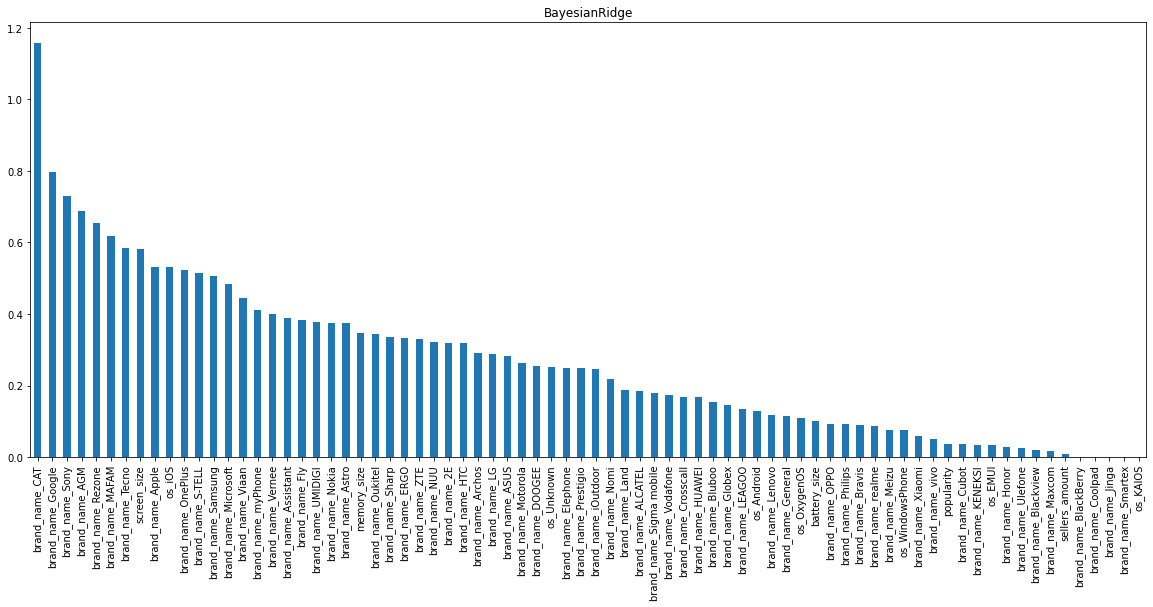

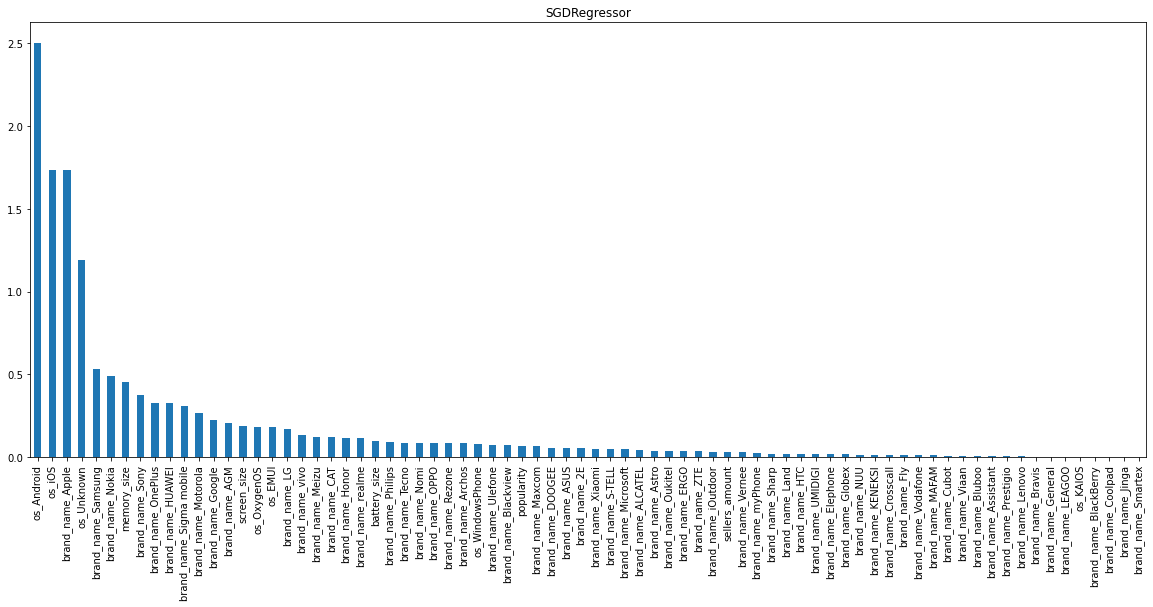

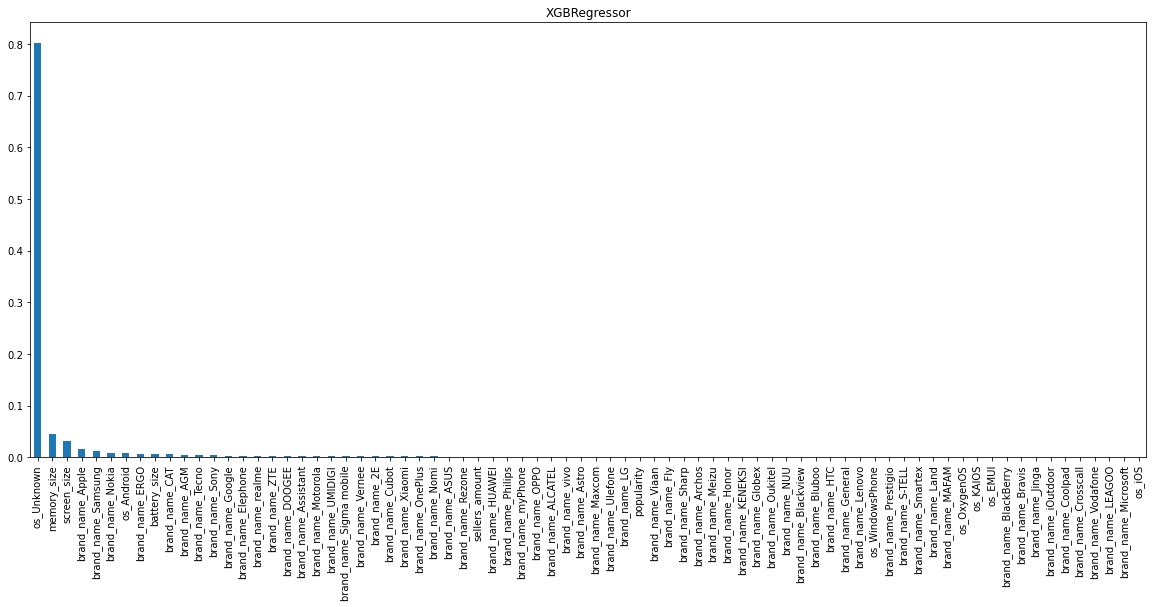

In [39]:
def plot_importance(series):
    data = series.apply(np.abs).sort_values(ascending=False)
    
    plt.figure(figsize=(WIDTH, HEIGHT))
    data.plot(kind='bar')
    plt.title(data.name)
    plt.show()

_ = pd.DataFrame.from_dict(importances)[['BayesianRidge', 'SGDRegressor', 'XGBRegressor']].apply(lambda x: plot_importance(x), axis=0)

In [40]:
data[TARGET]

0        7.432484
1        7.497207
2        7.497207
3        7.497207
4        7.600402
          ...    
1219    10.029459
1220    10.110502
1221     9.082961
1222     9.839216
1223     6.810142
Name: best_price, Length: 1224, dtype: float64

In [41]:
model = XGBRegressor()

_ = model.fit(X, y)

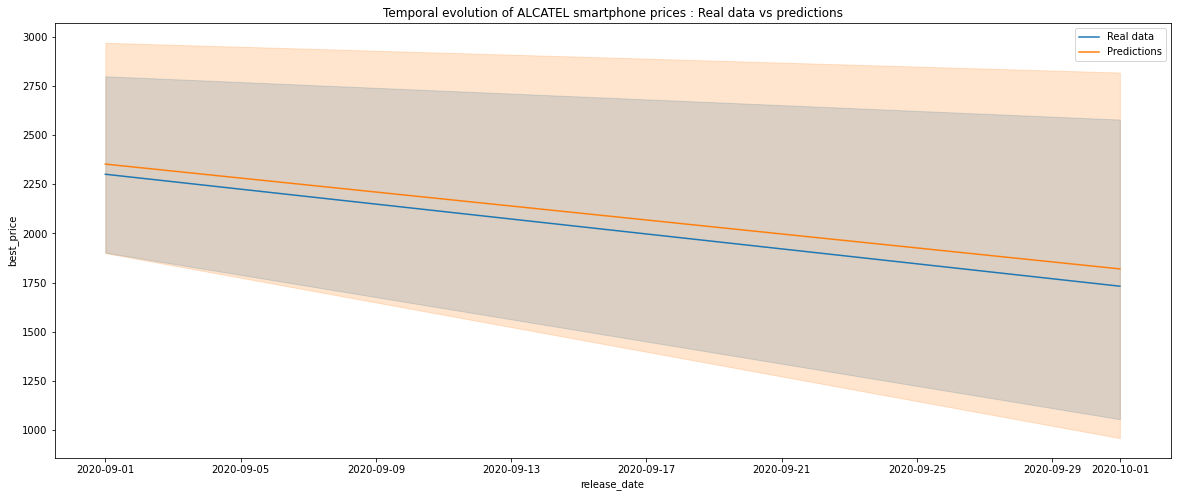

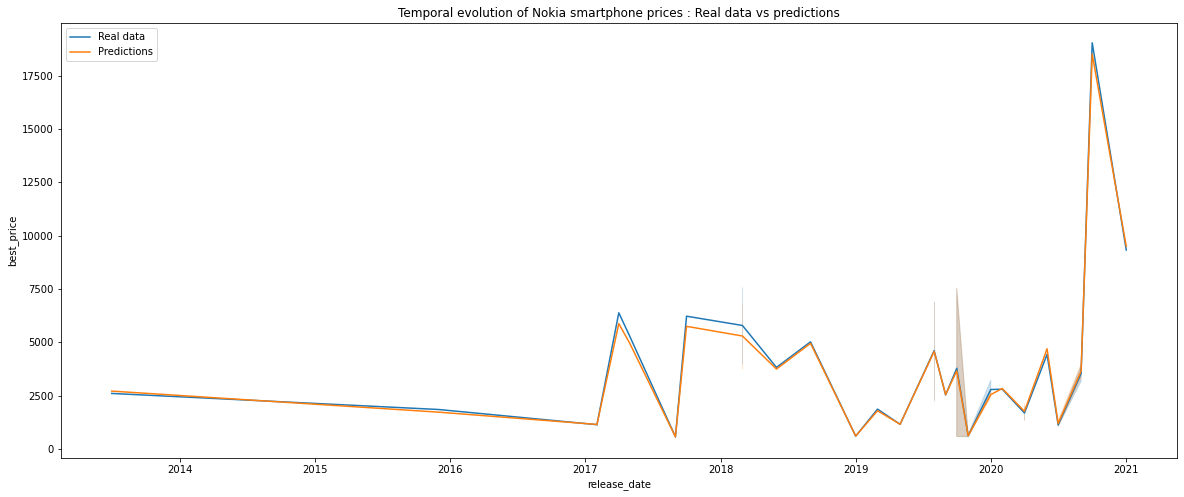

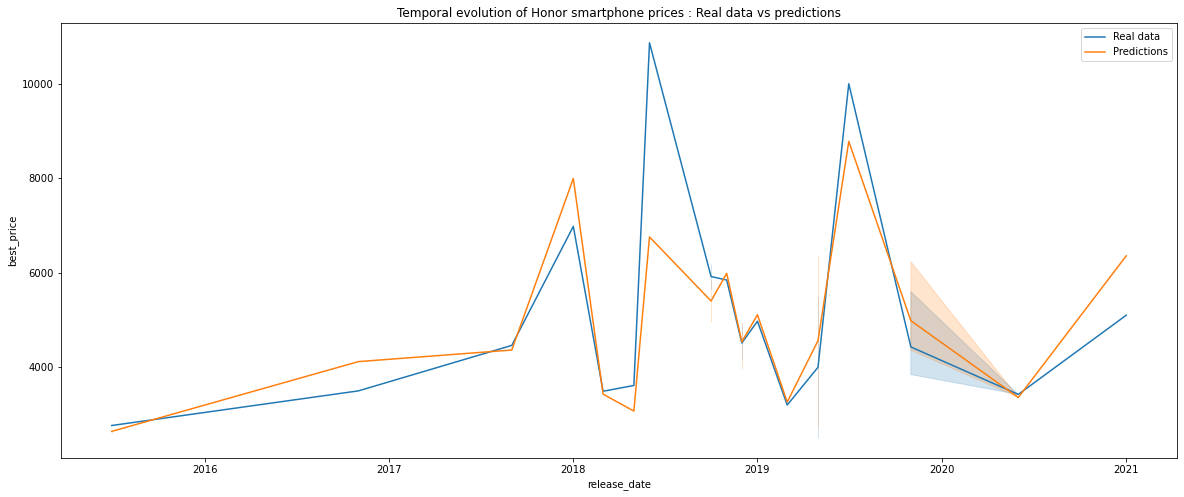

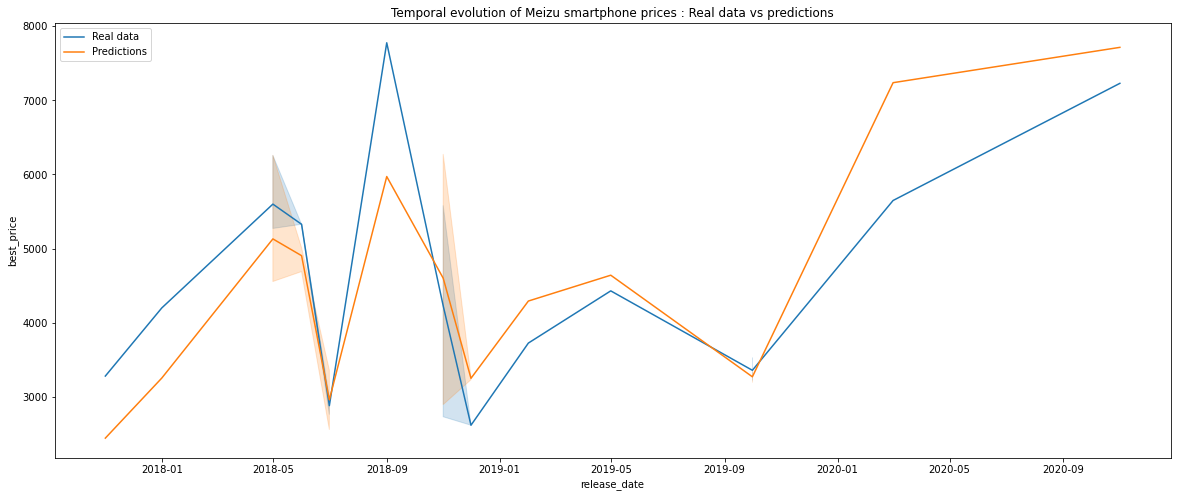

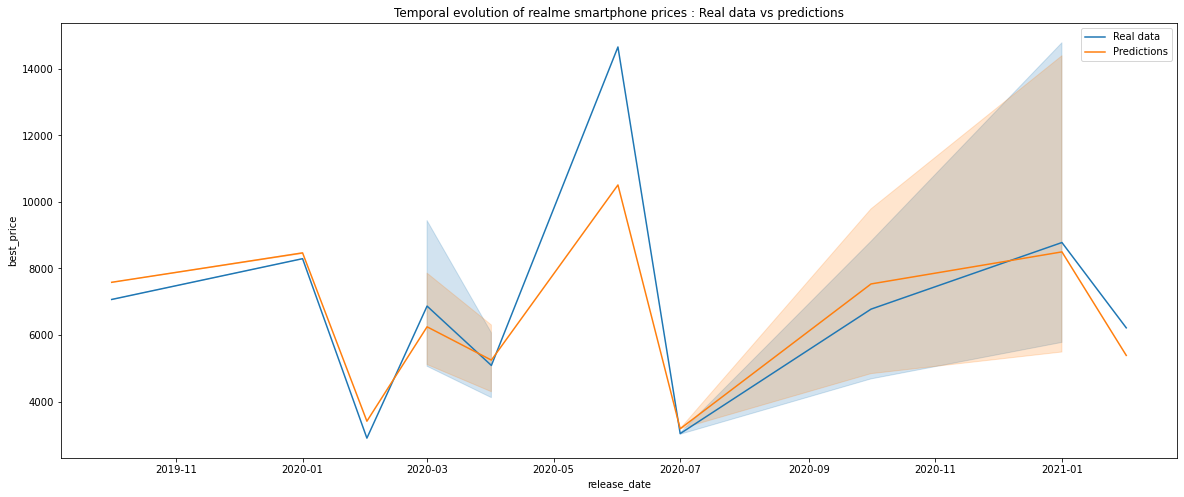

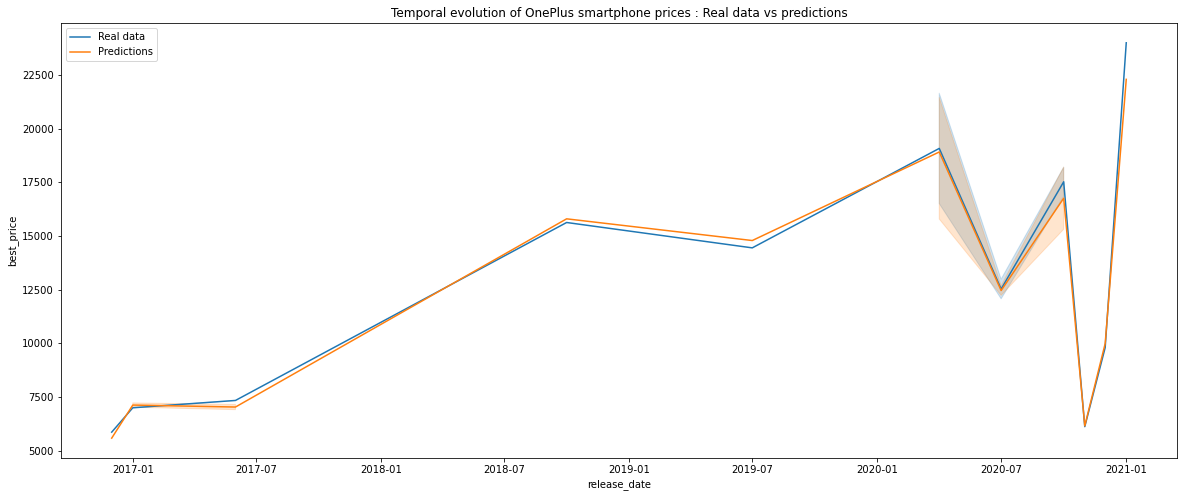

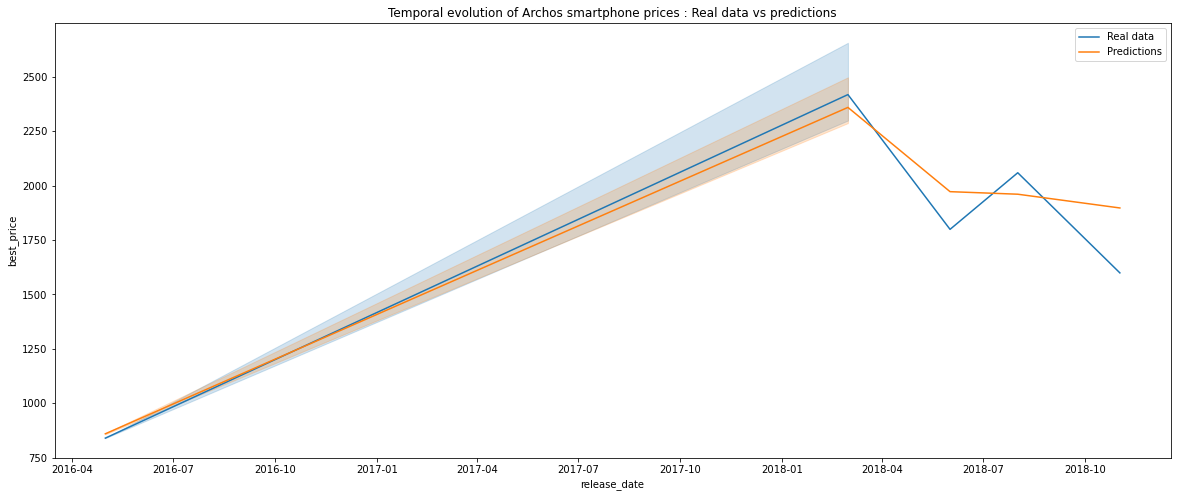

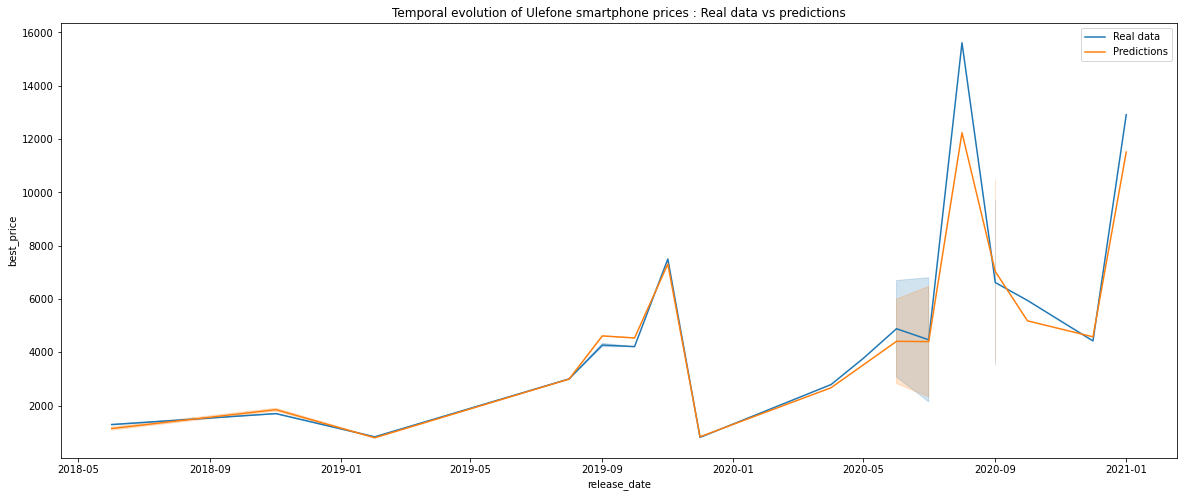

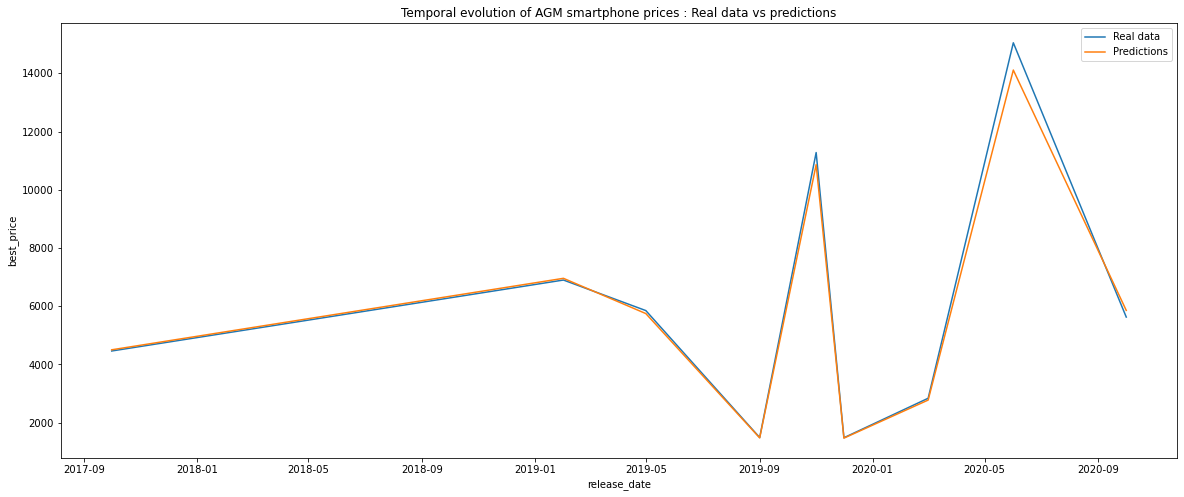

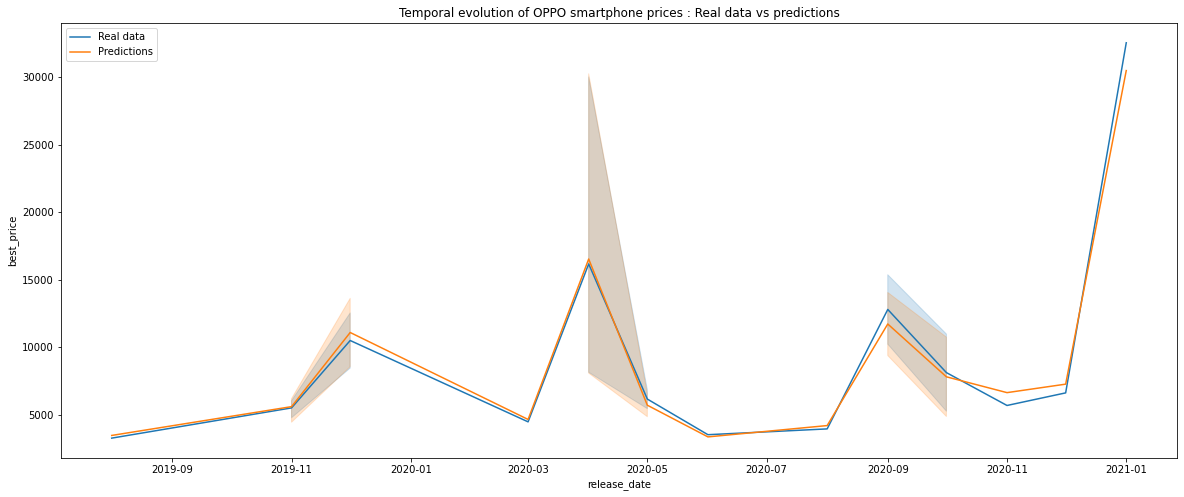

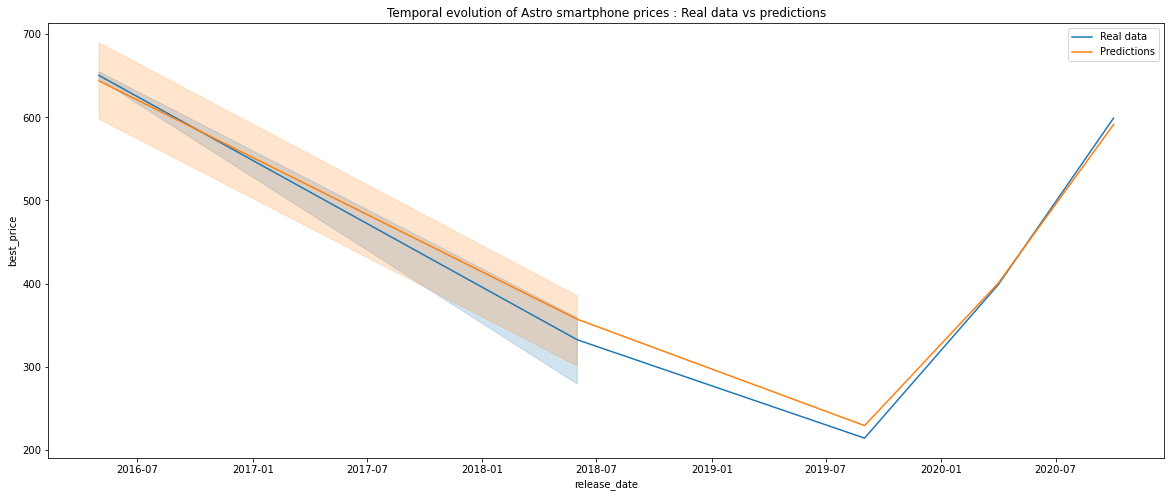

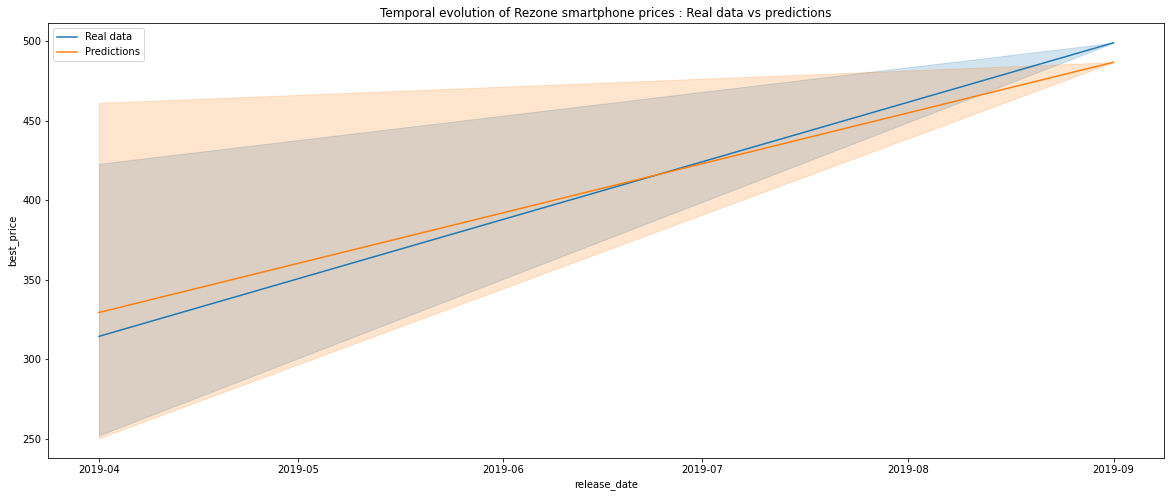

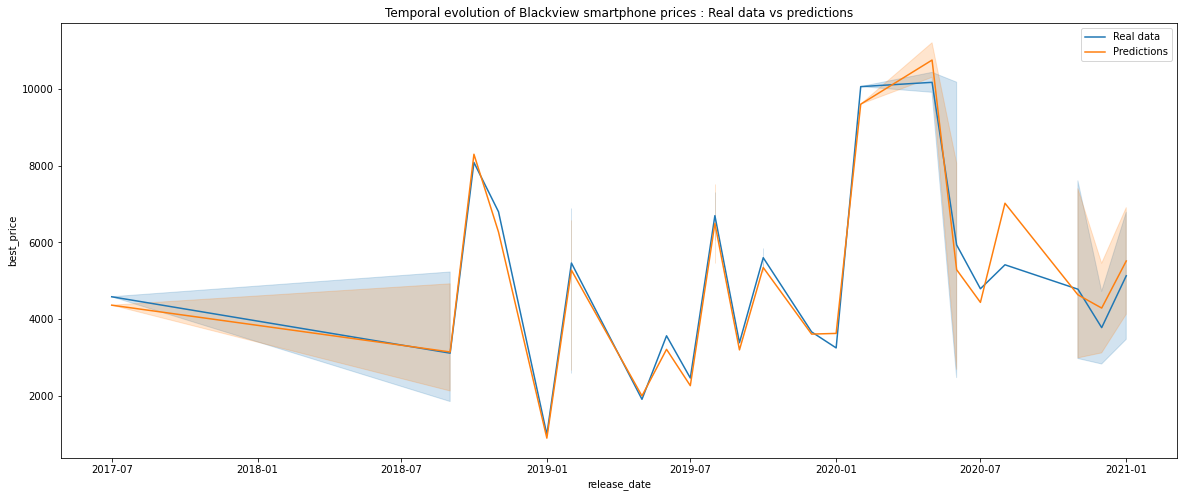

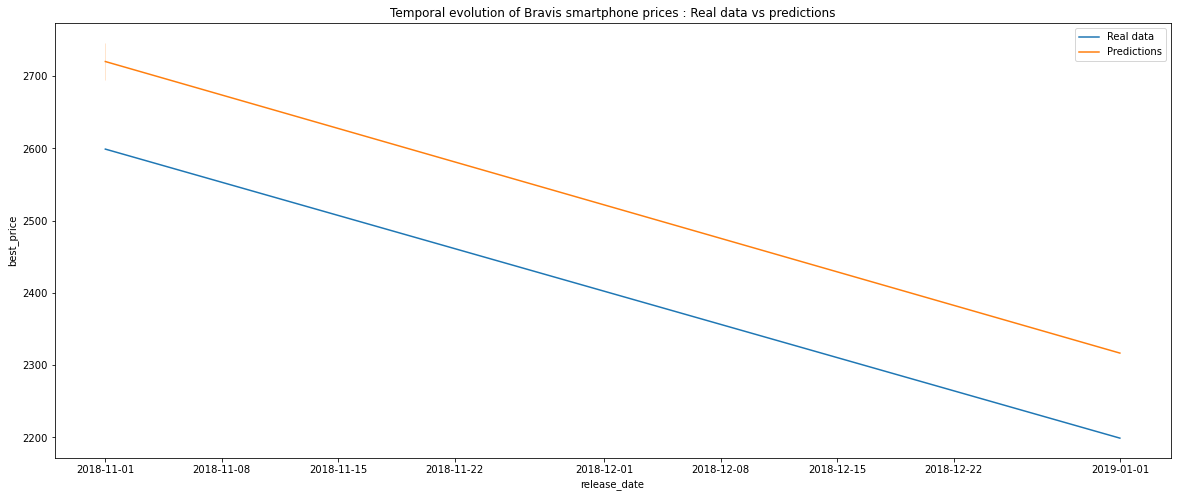

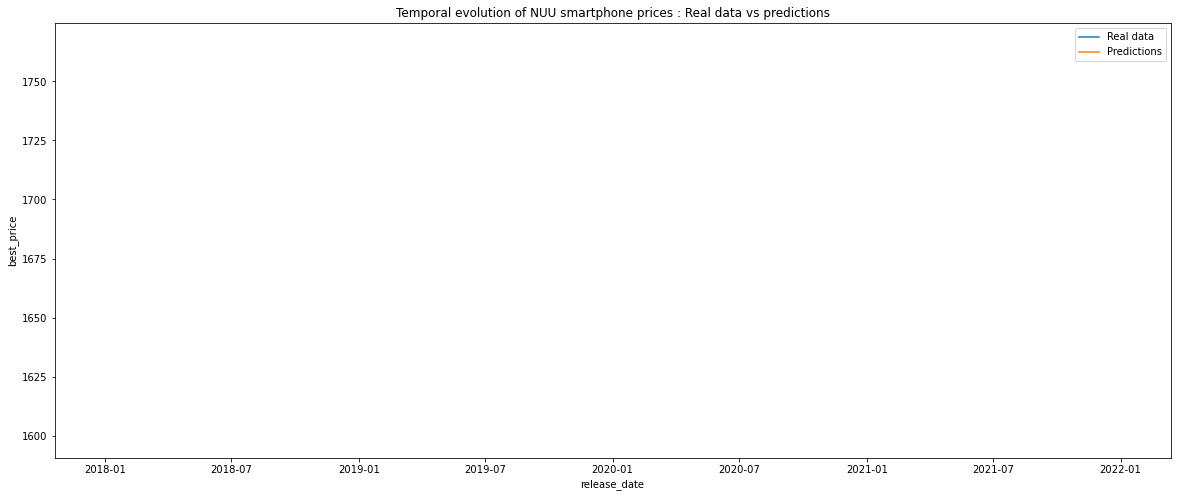

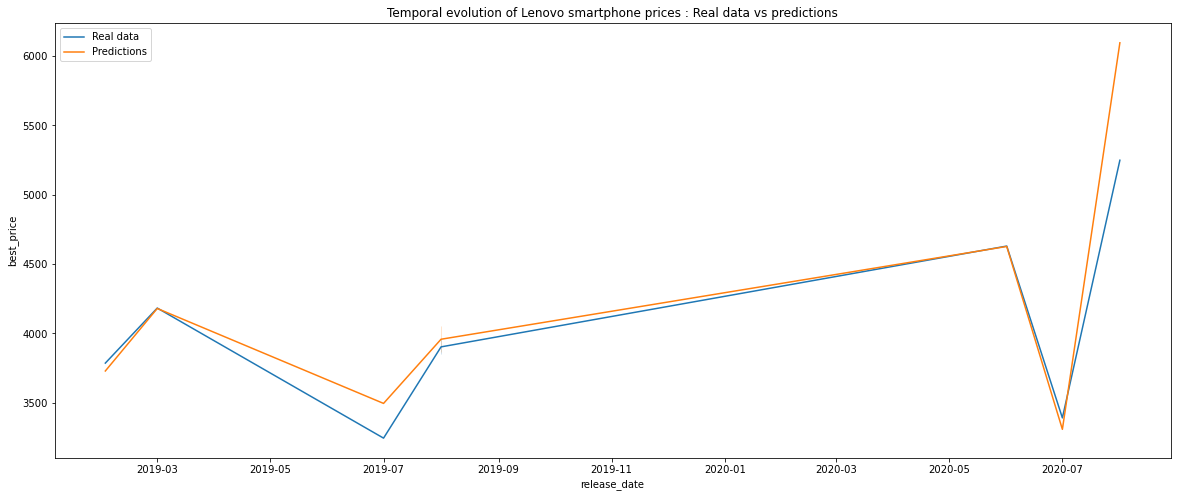

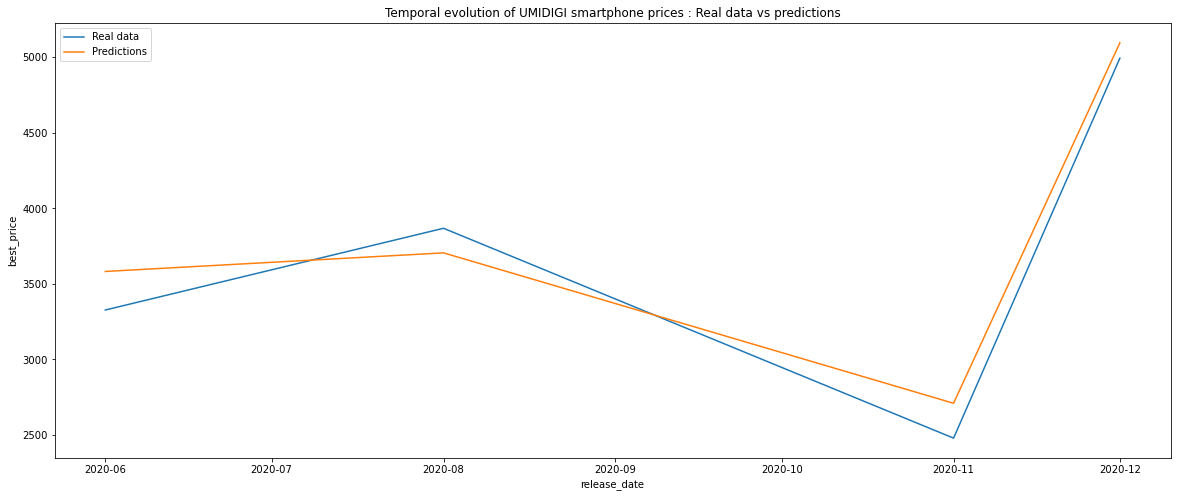

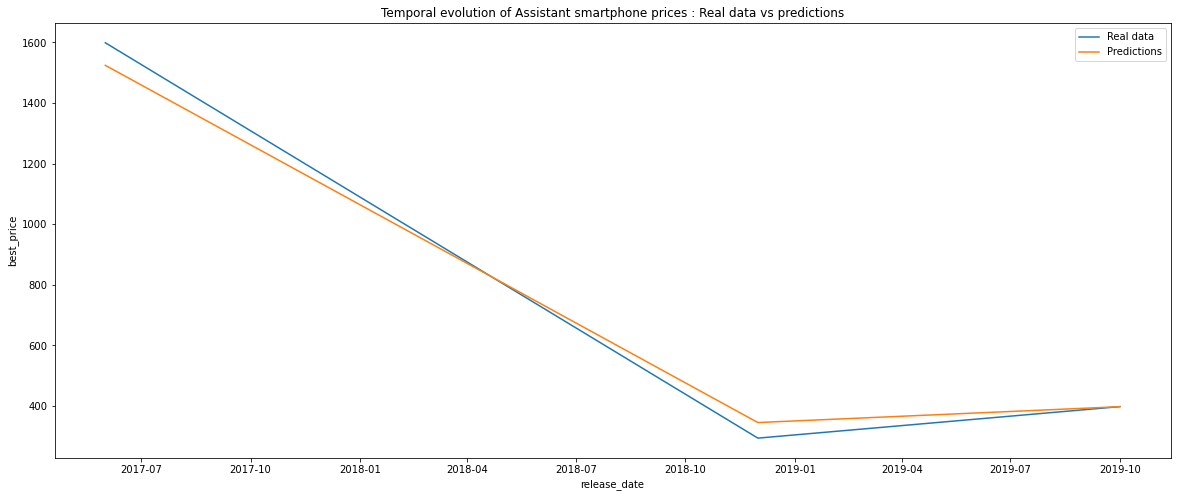

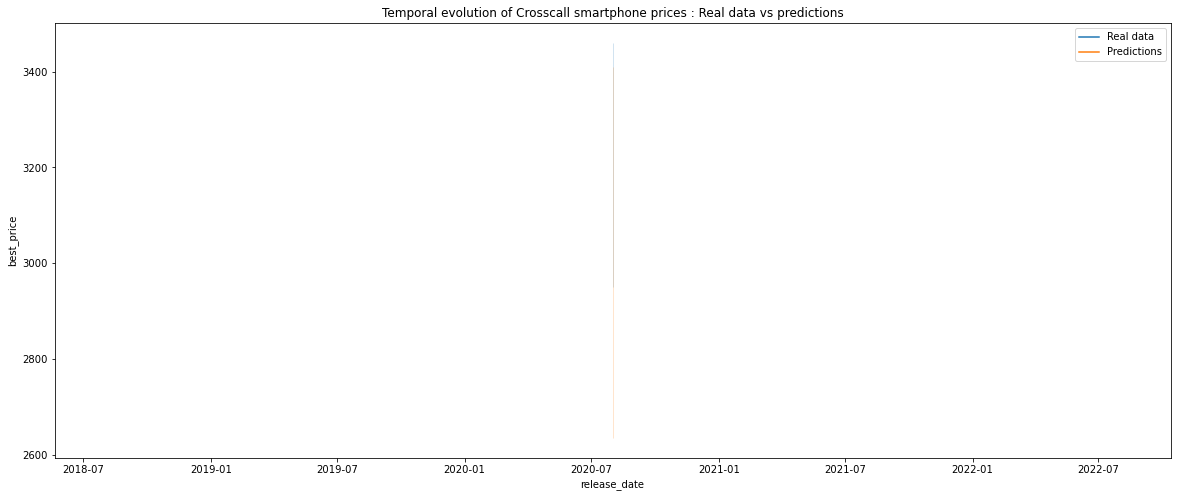

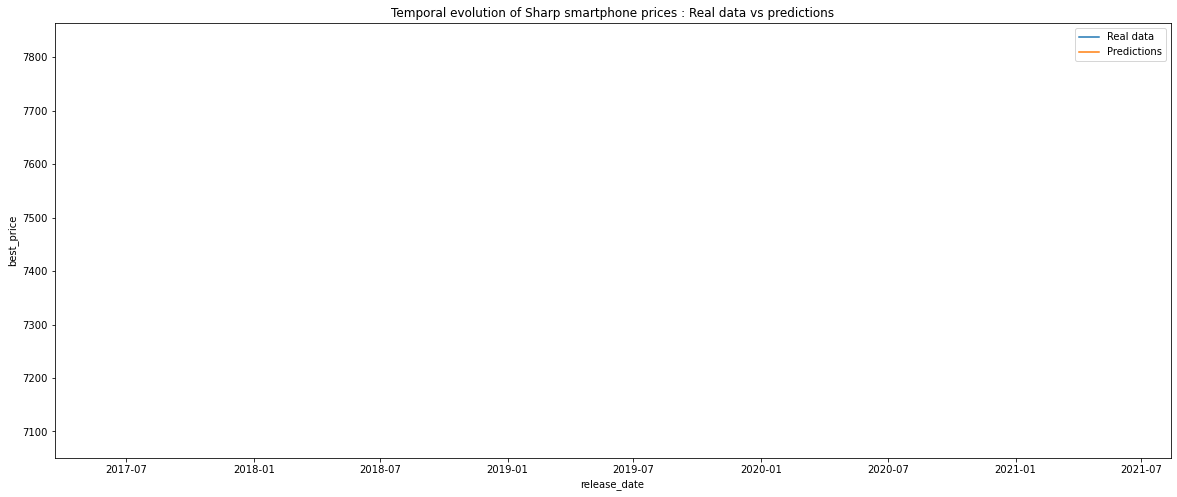

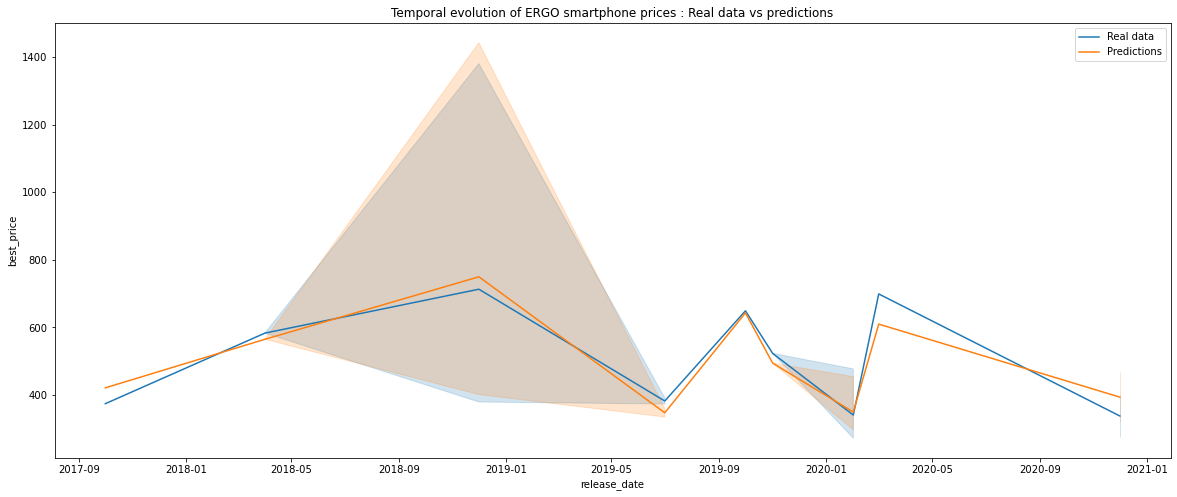

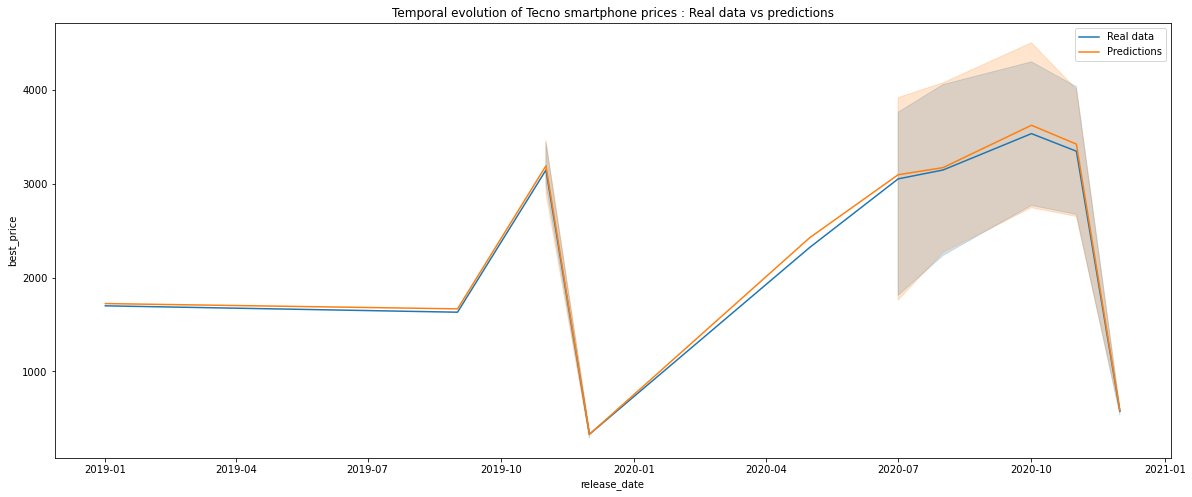

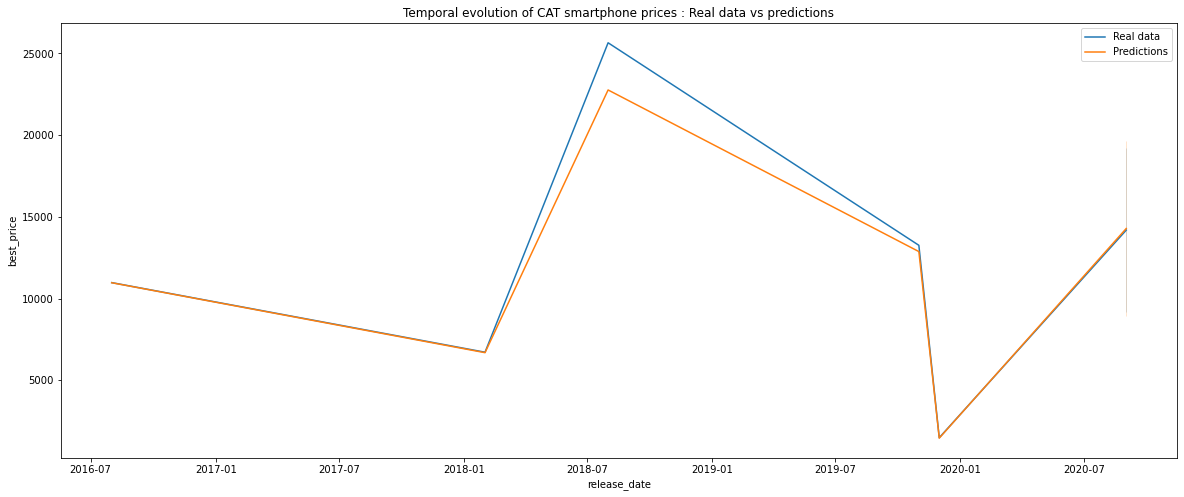

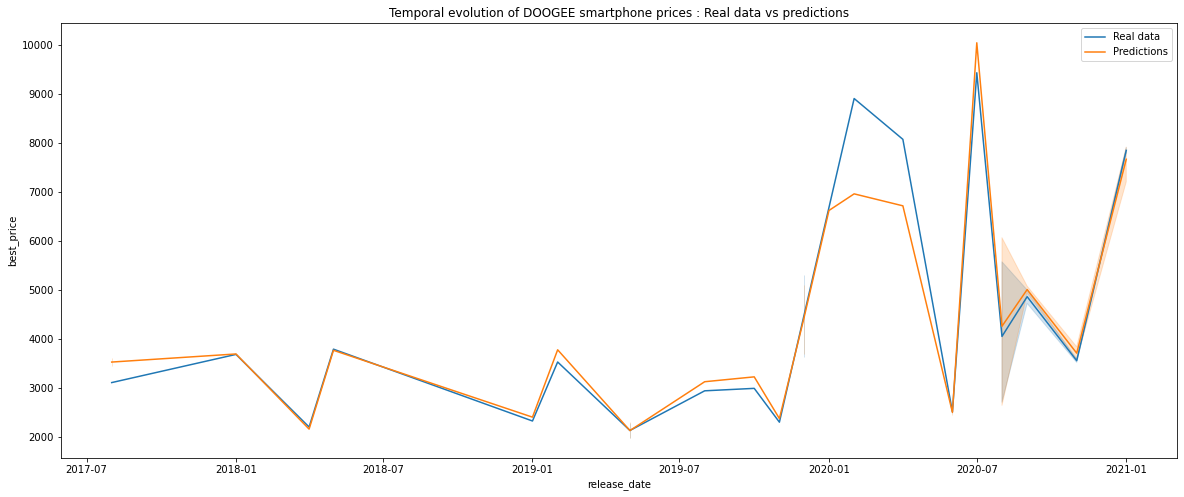

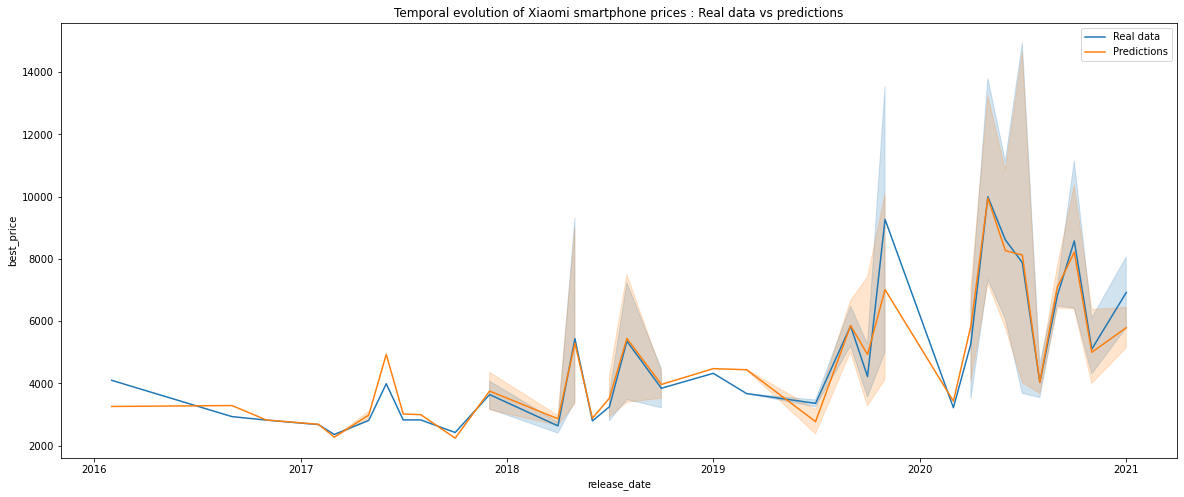

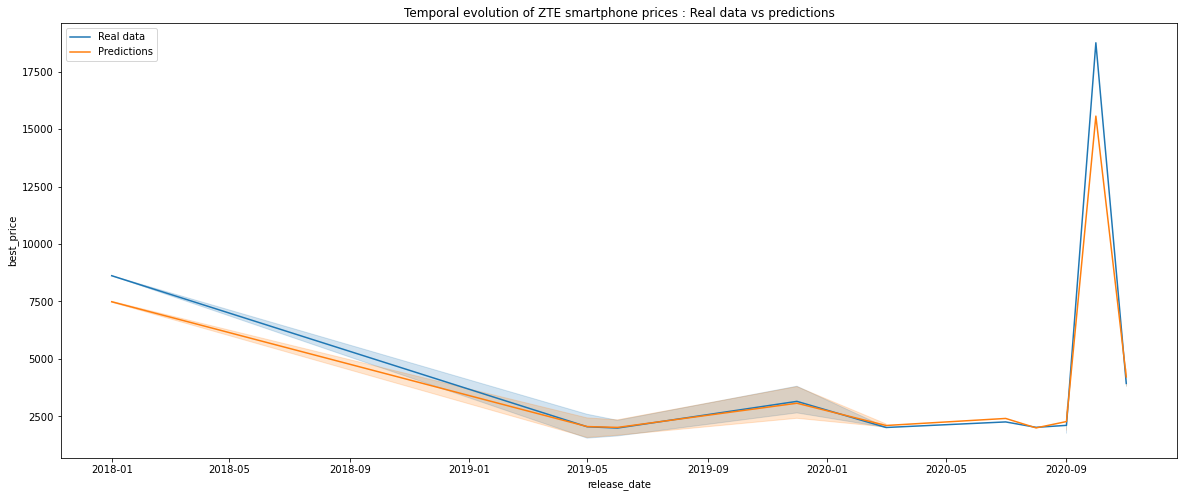

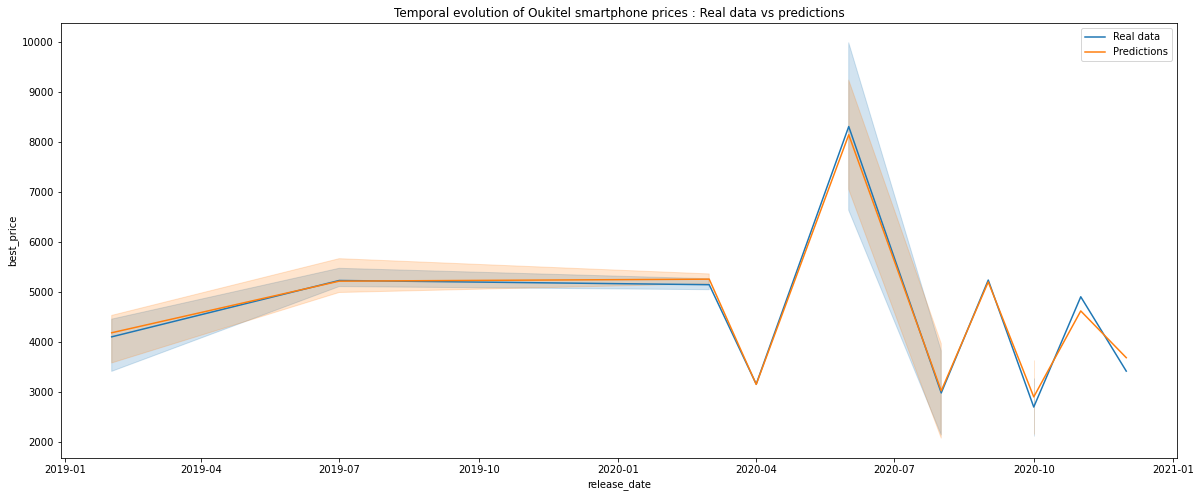

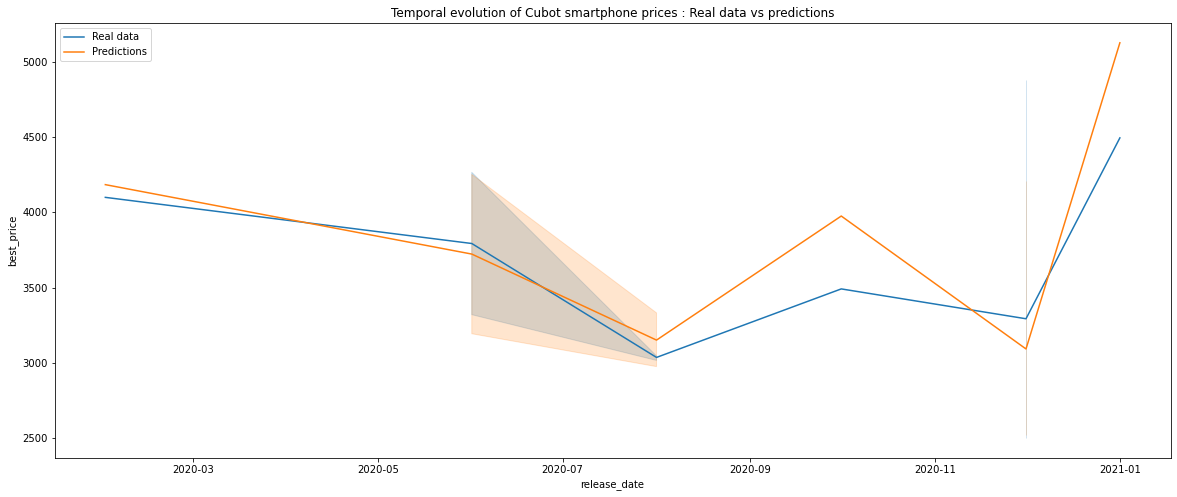

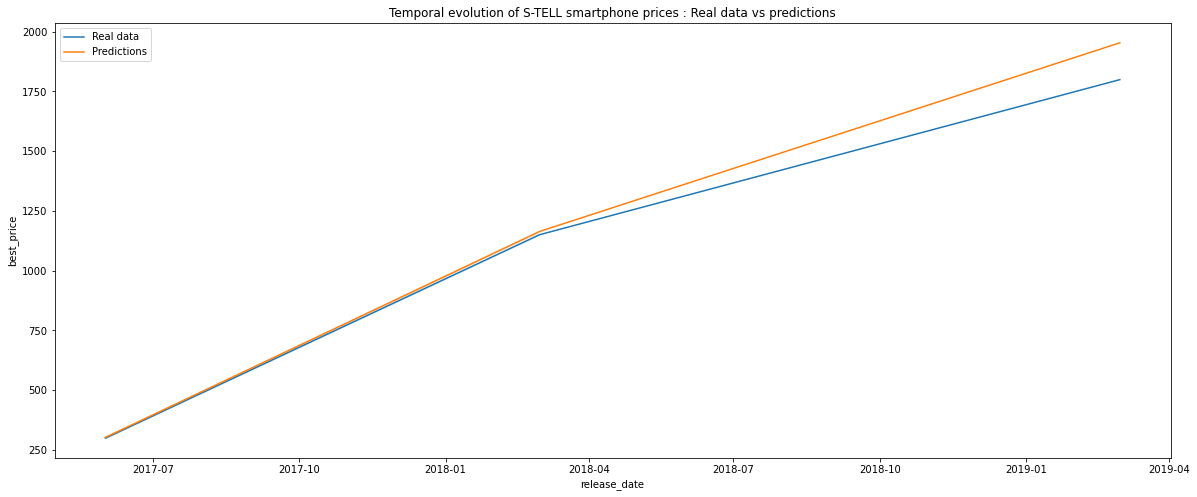

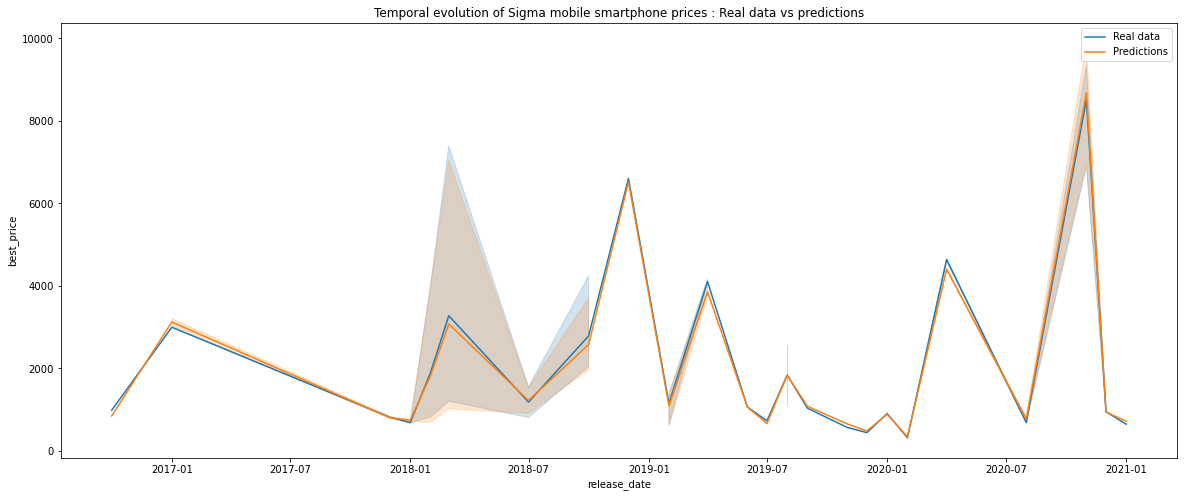

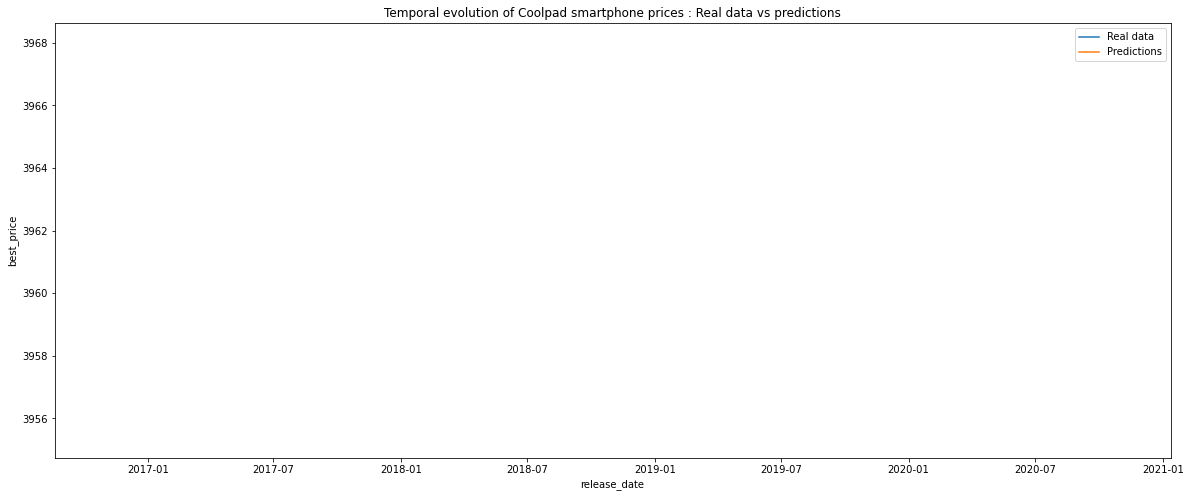

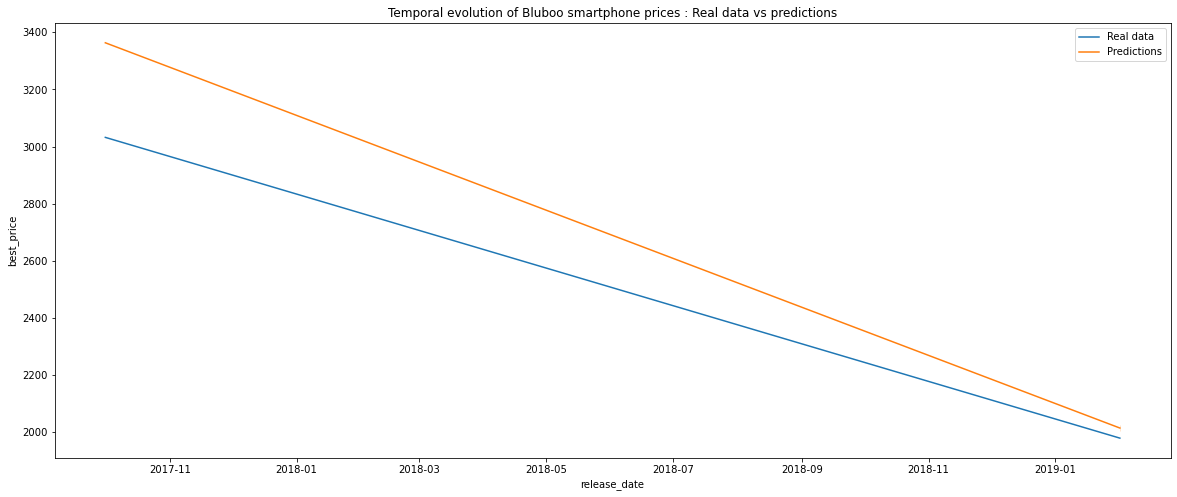

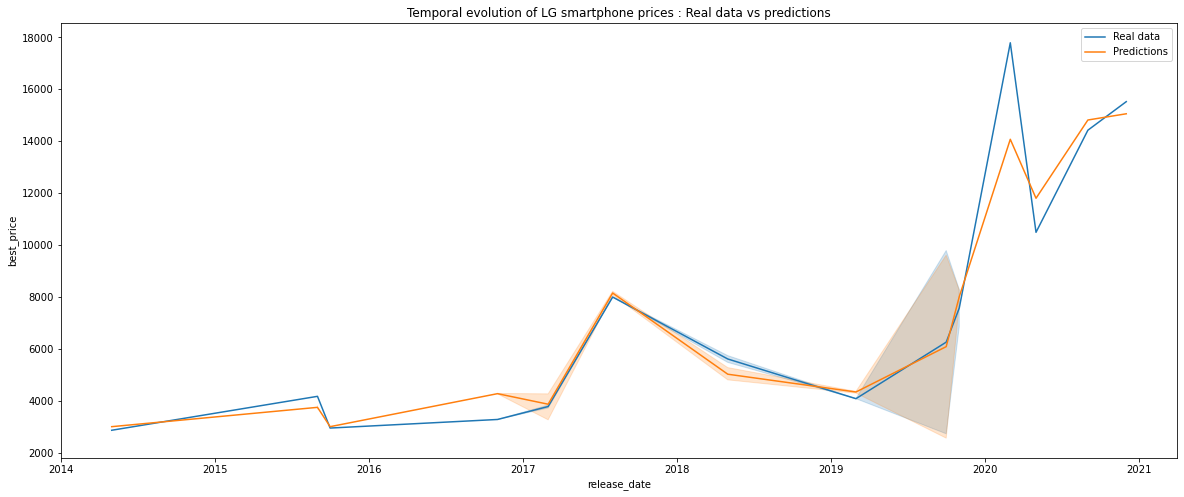

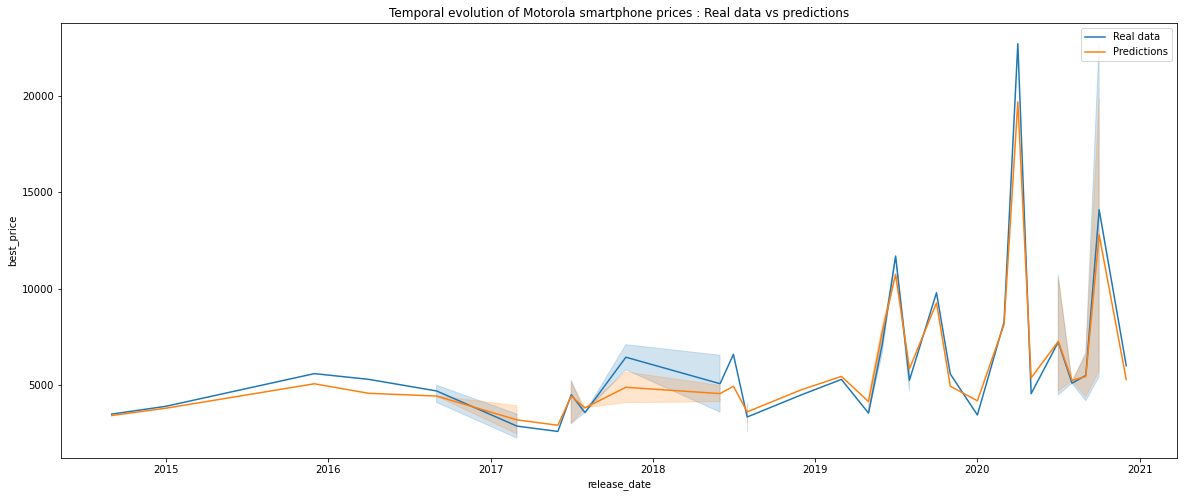

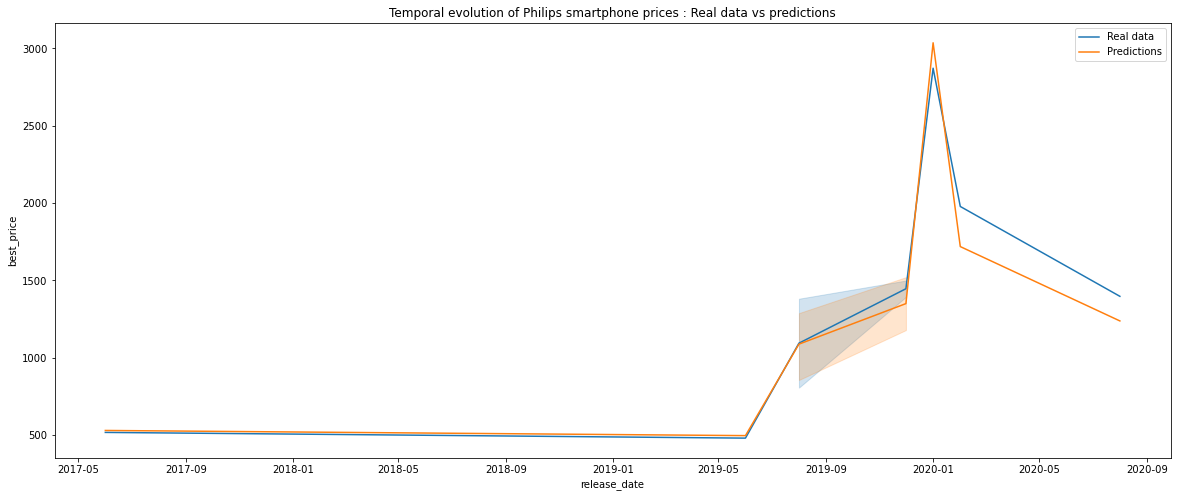

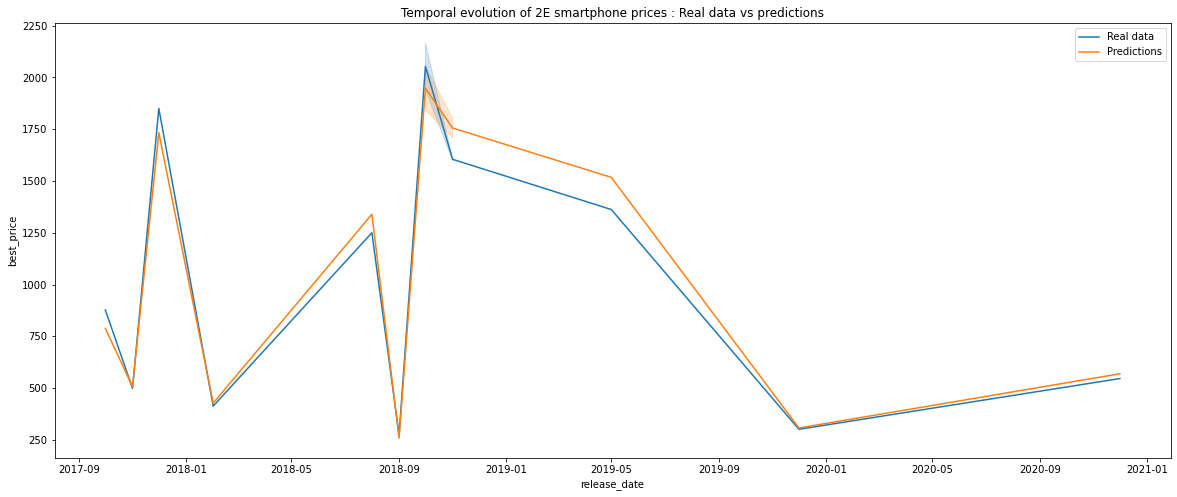

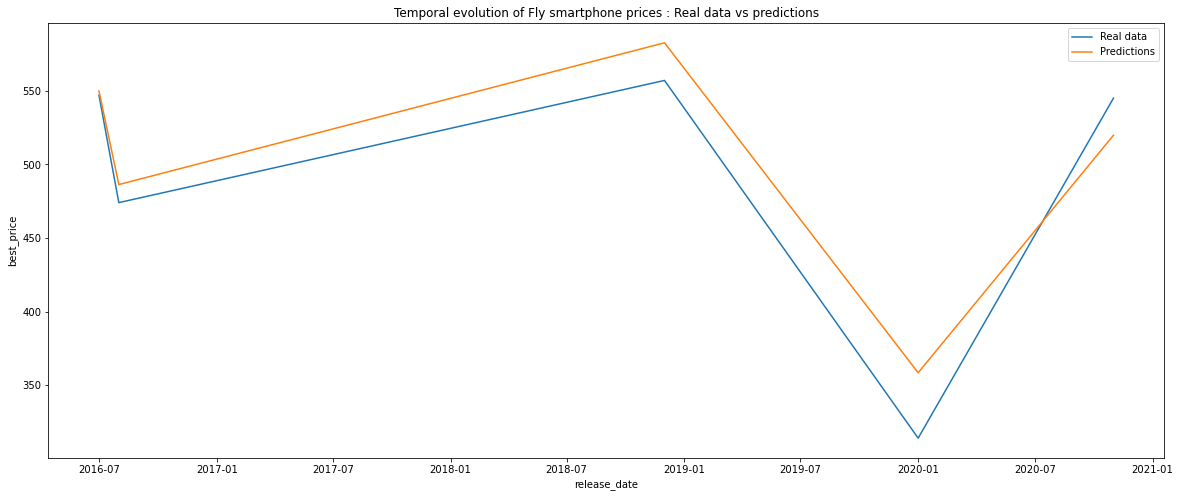

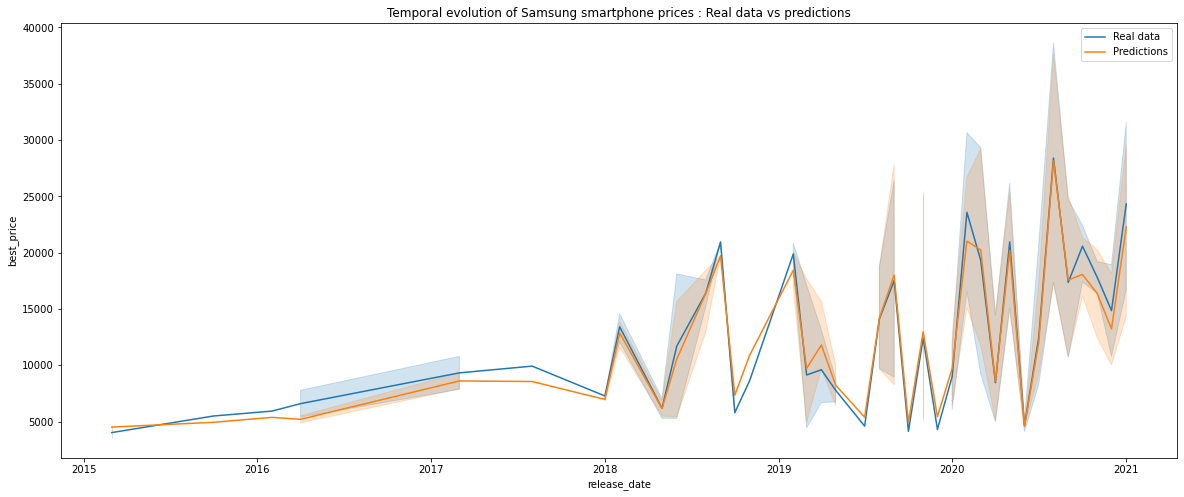

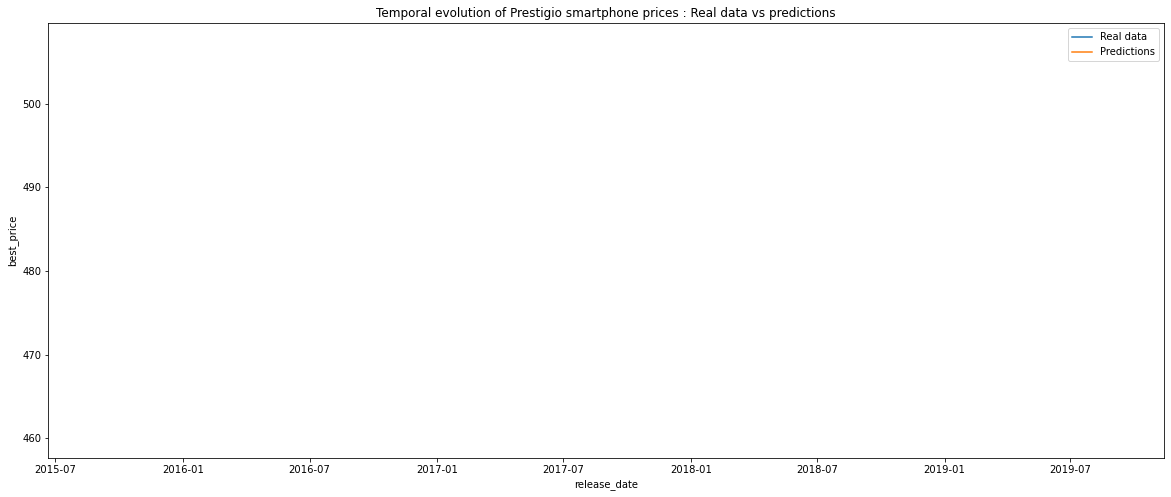

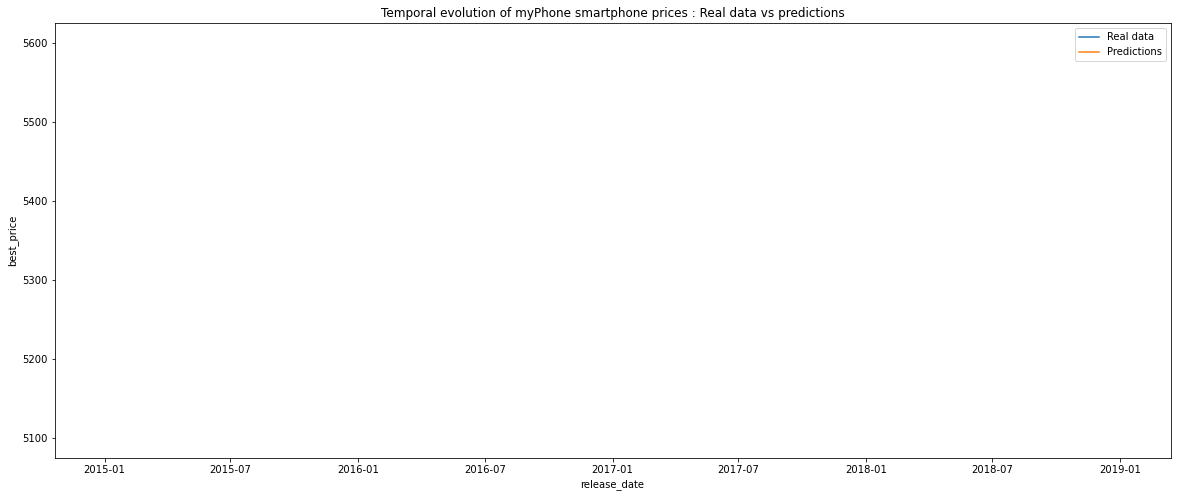

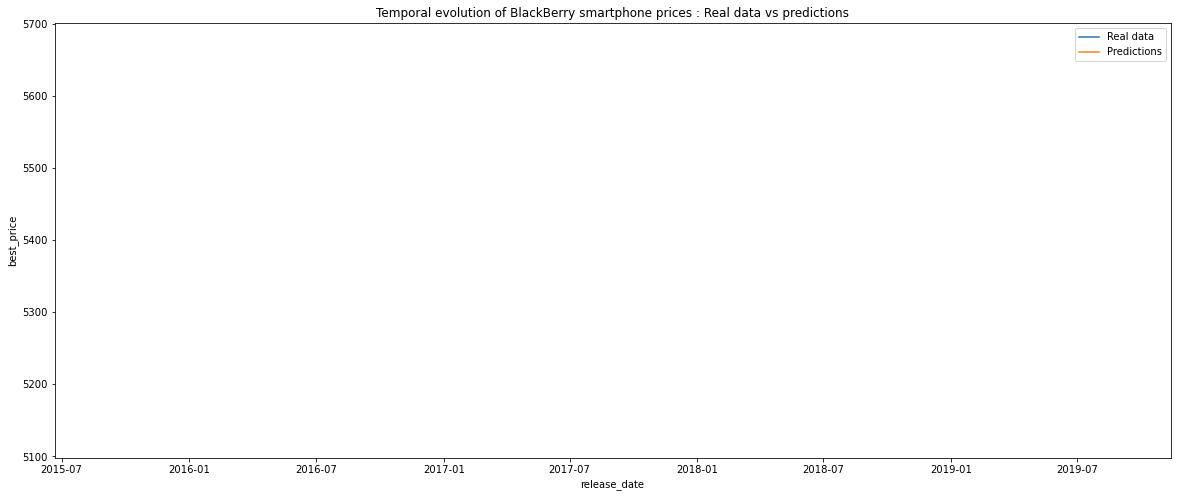

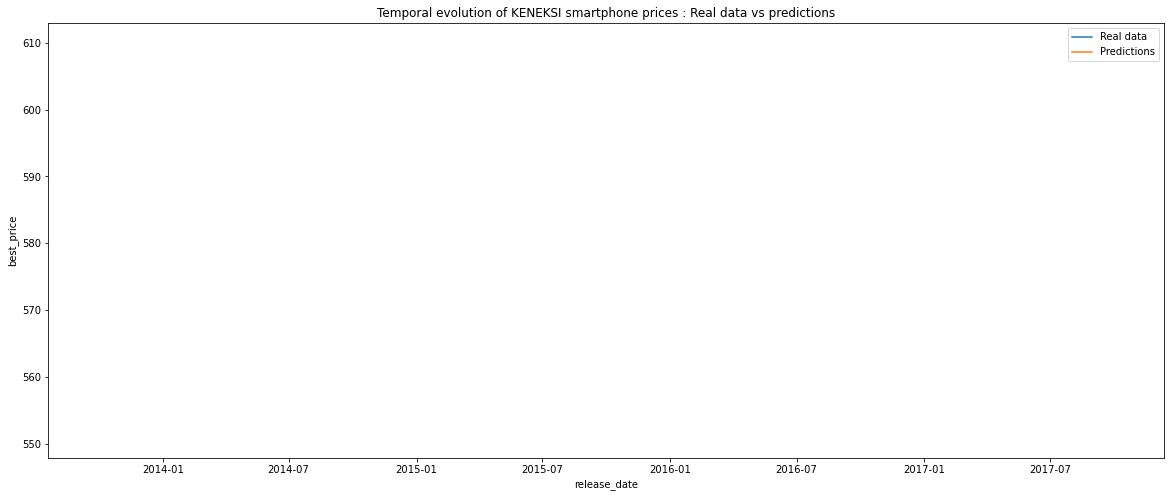

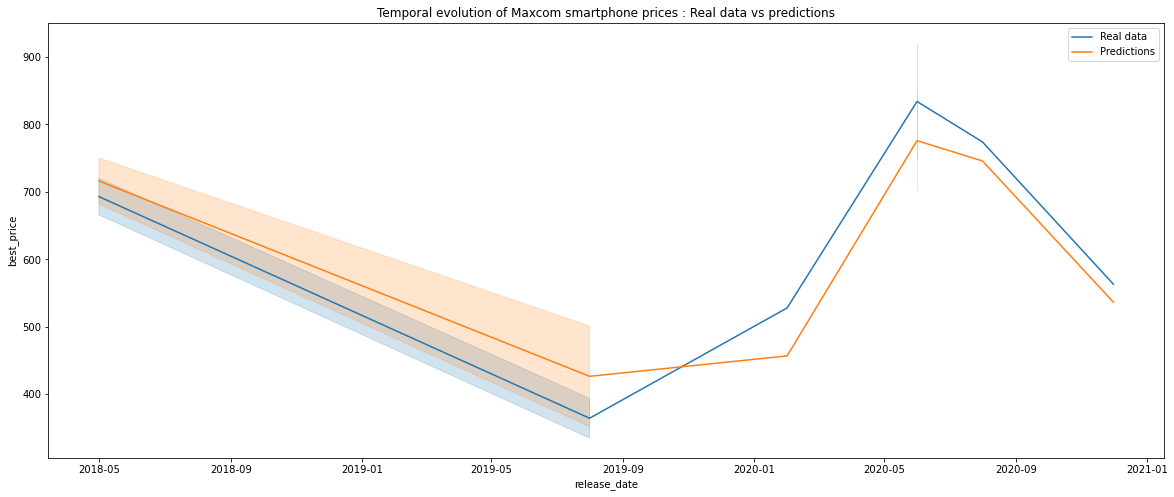

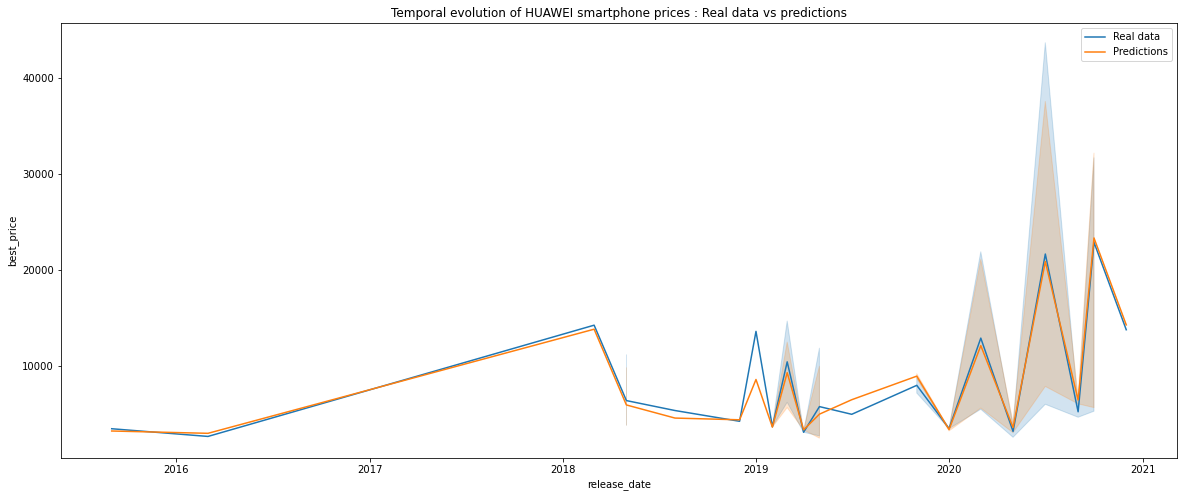

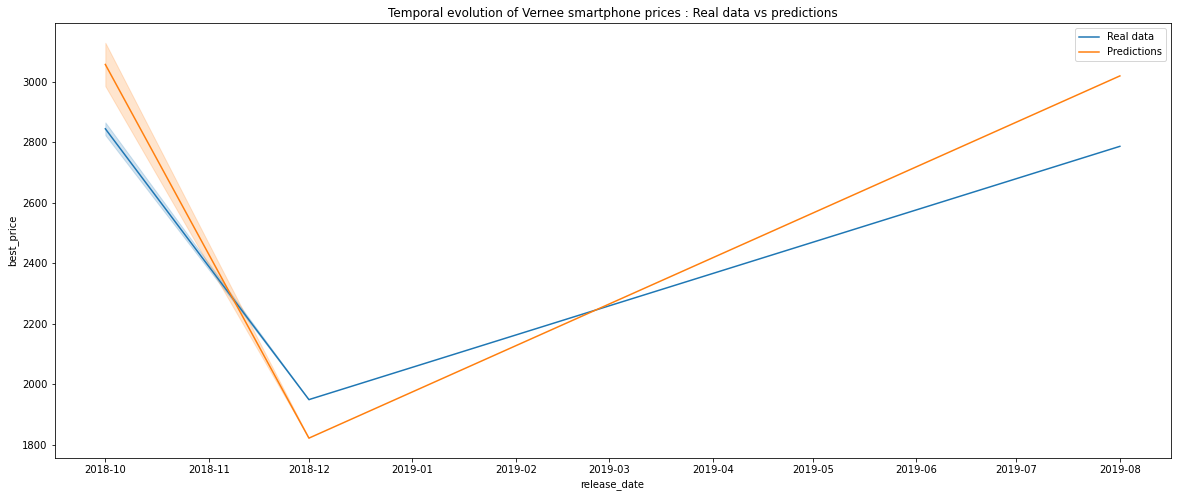

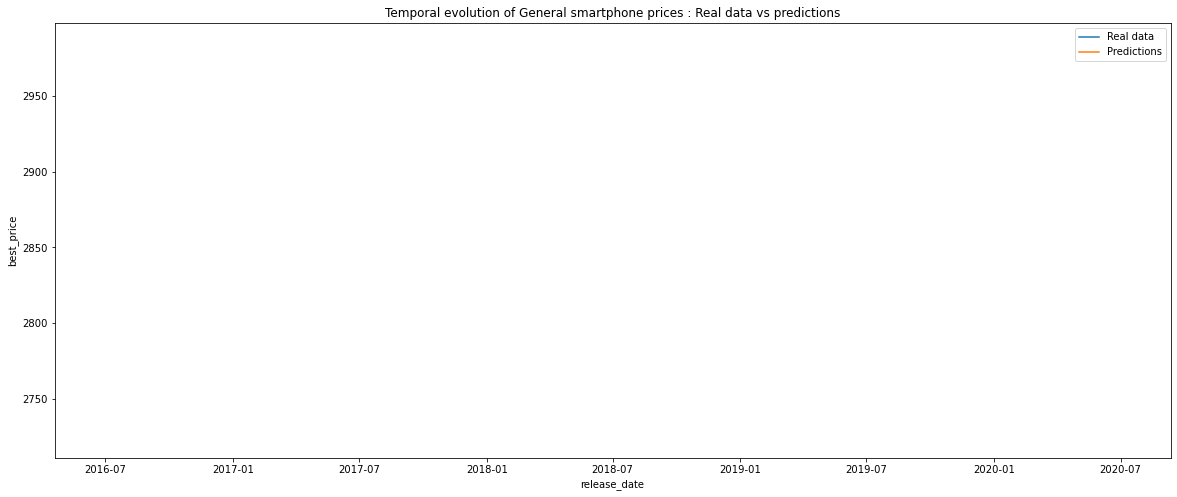

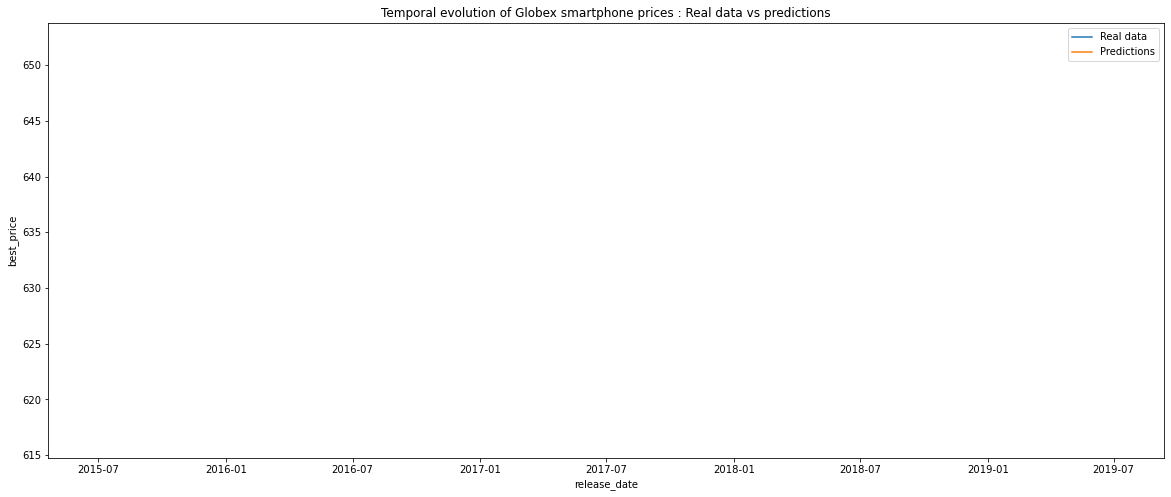

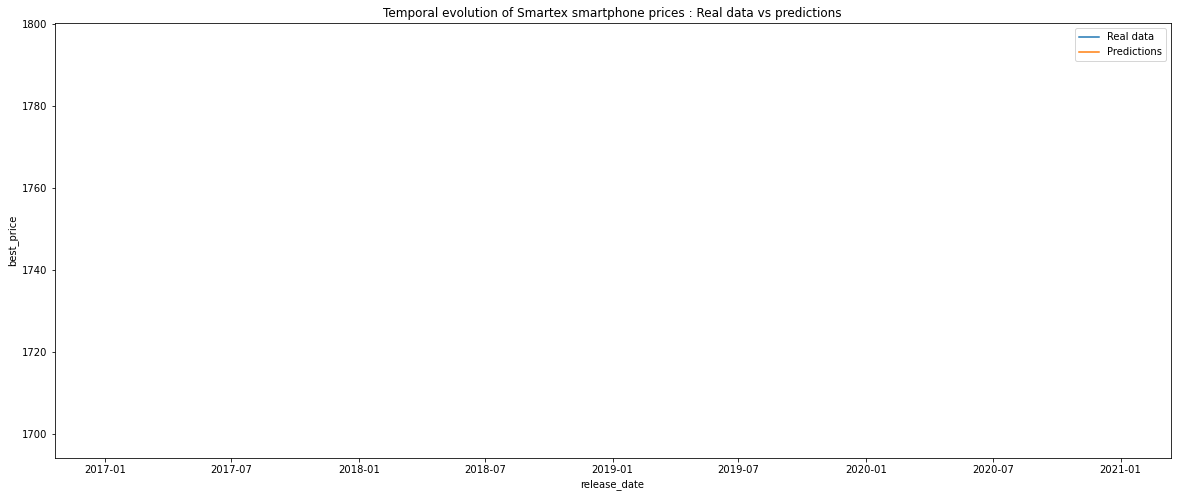

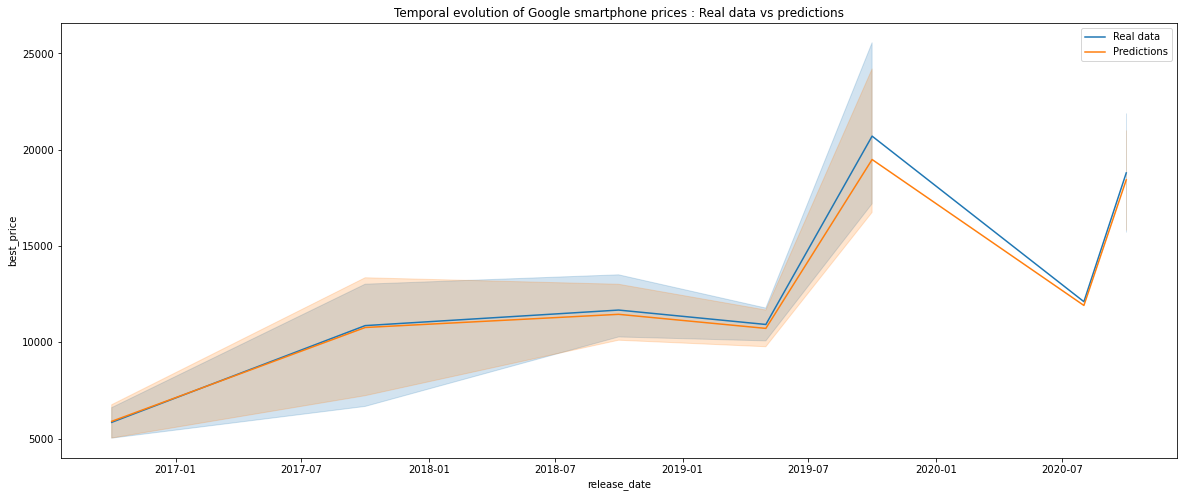

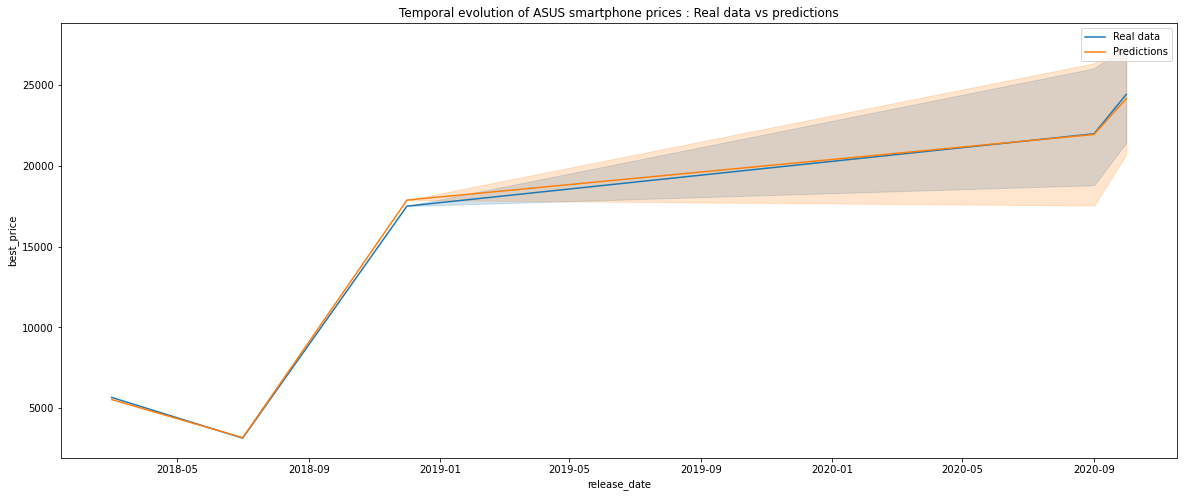

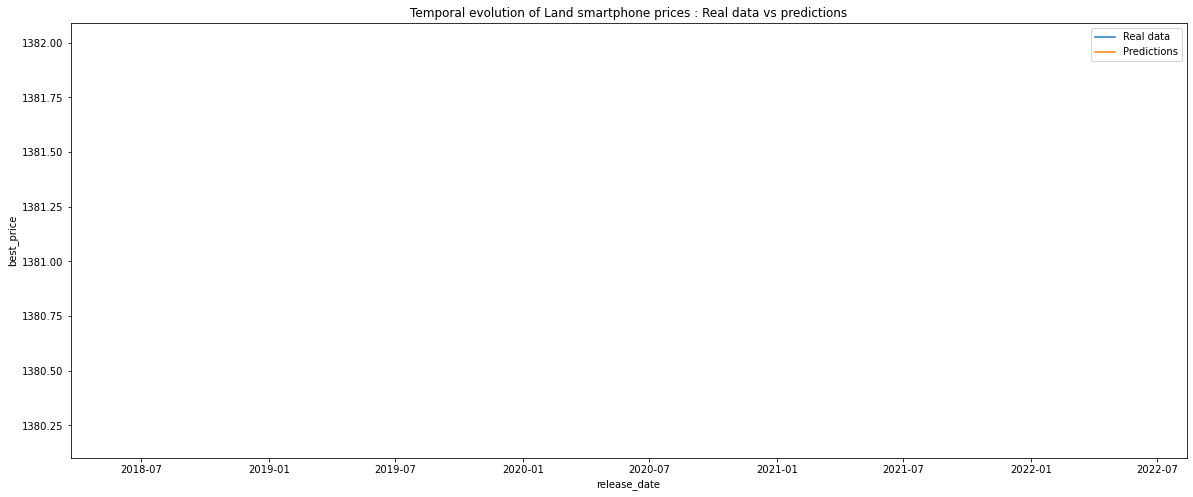

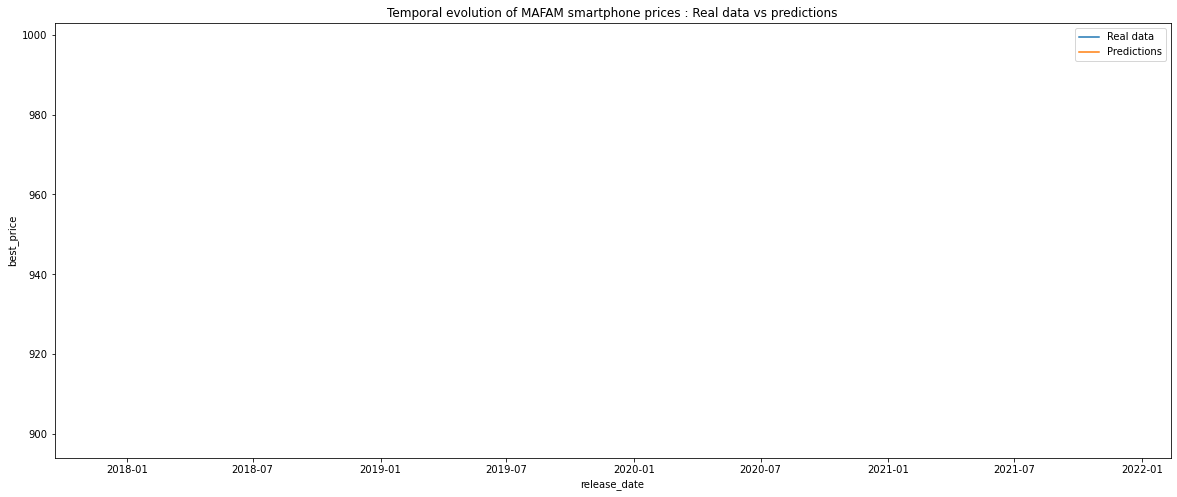

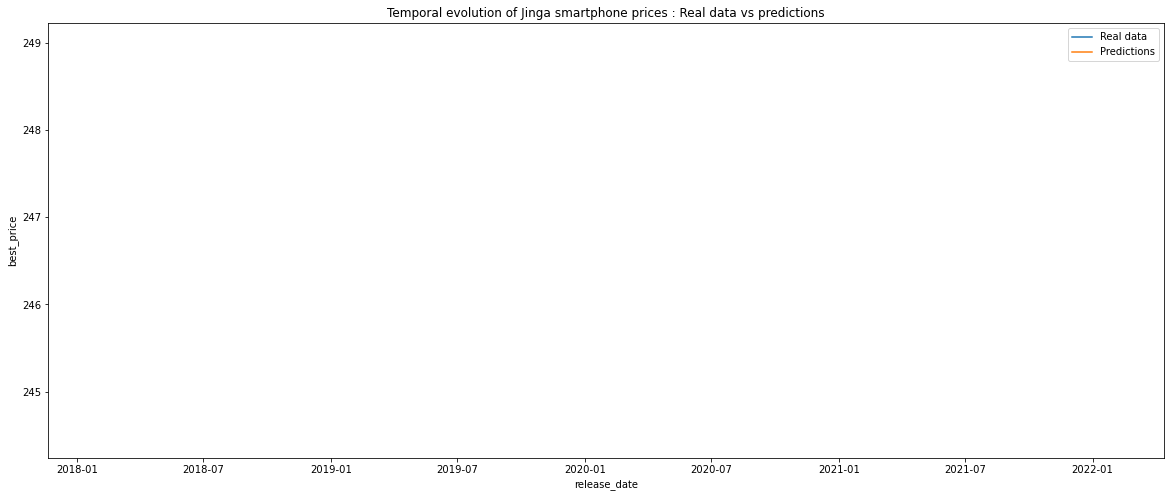

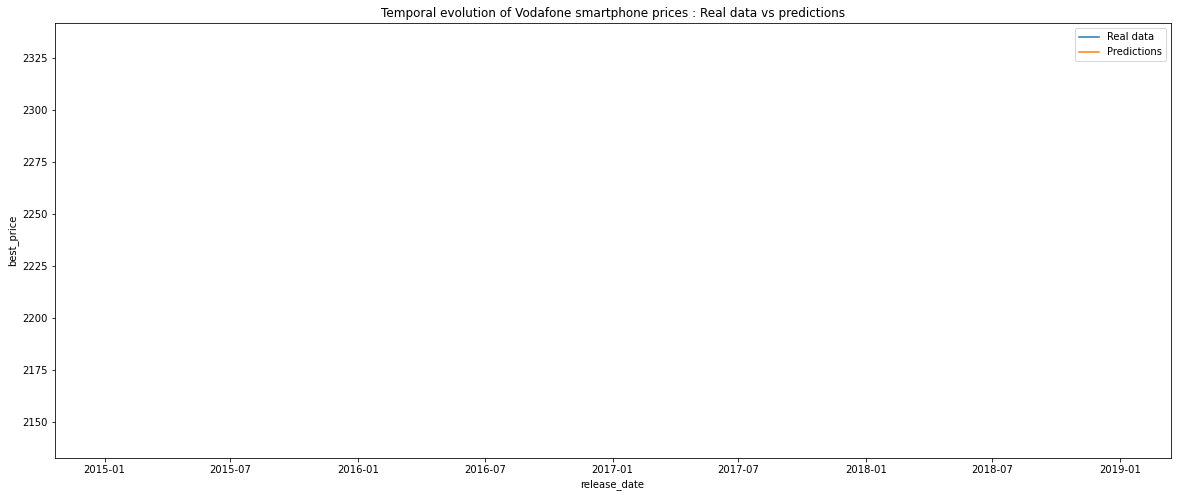

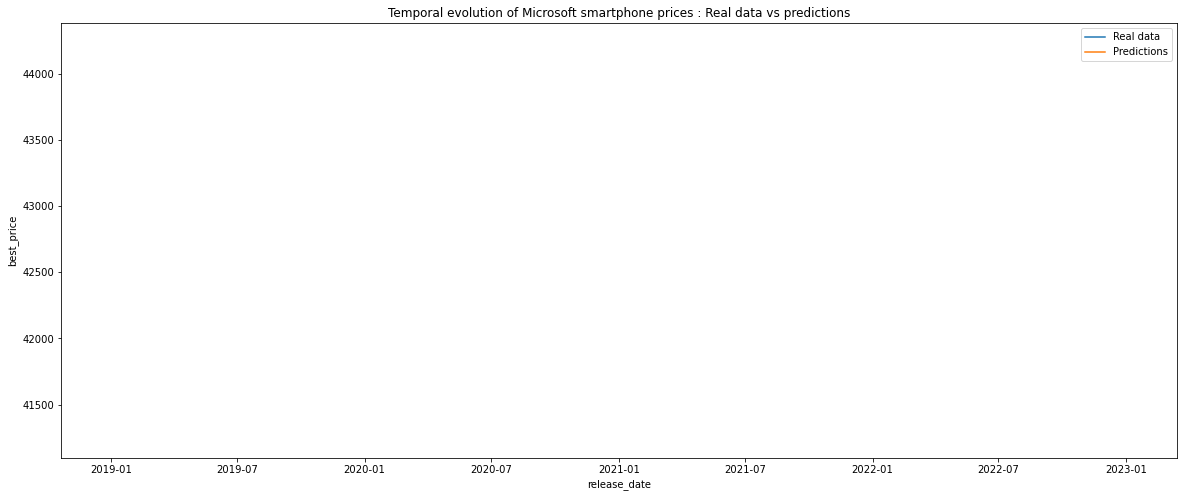

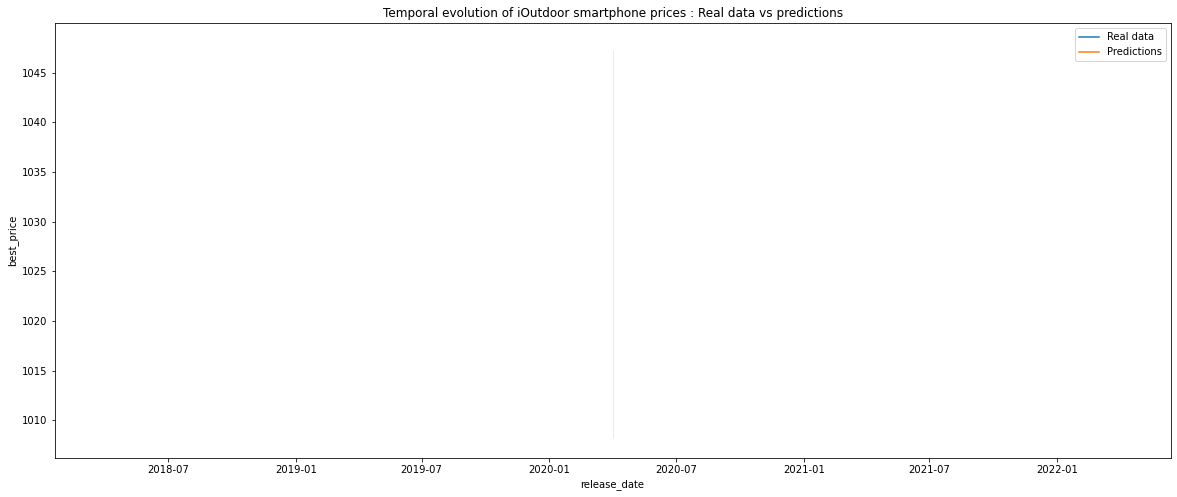

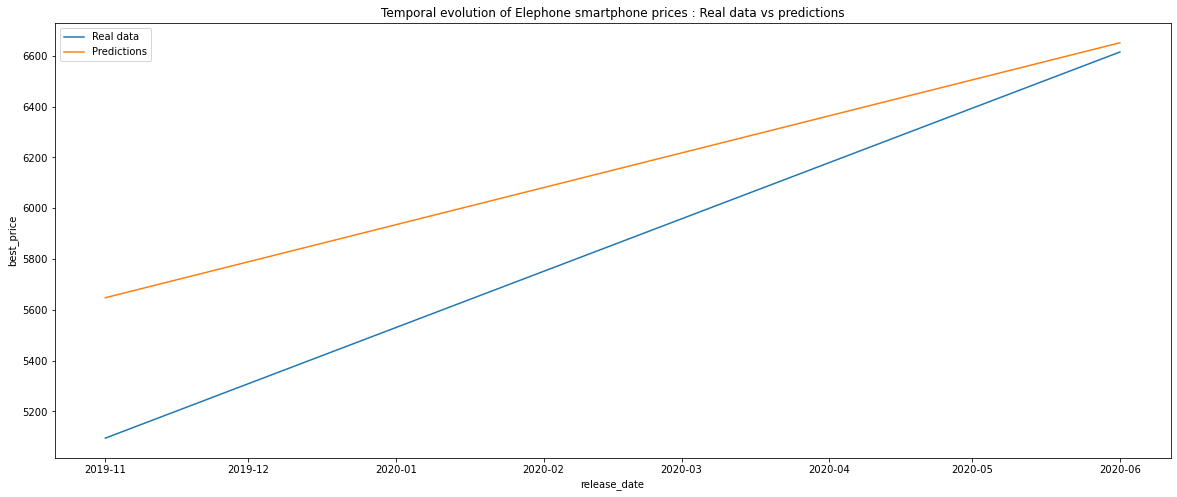

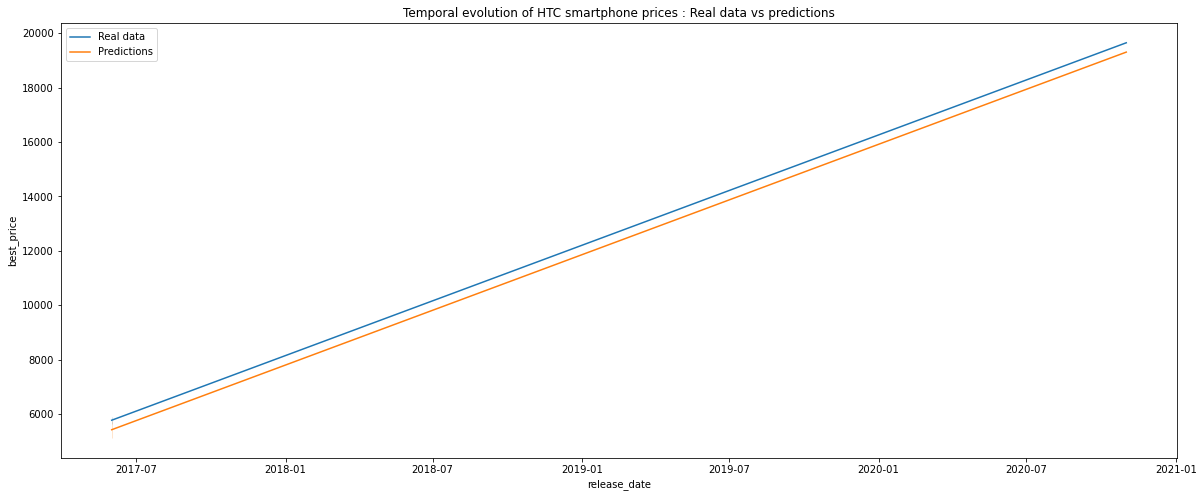

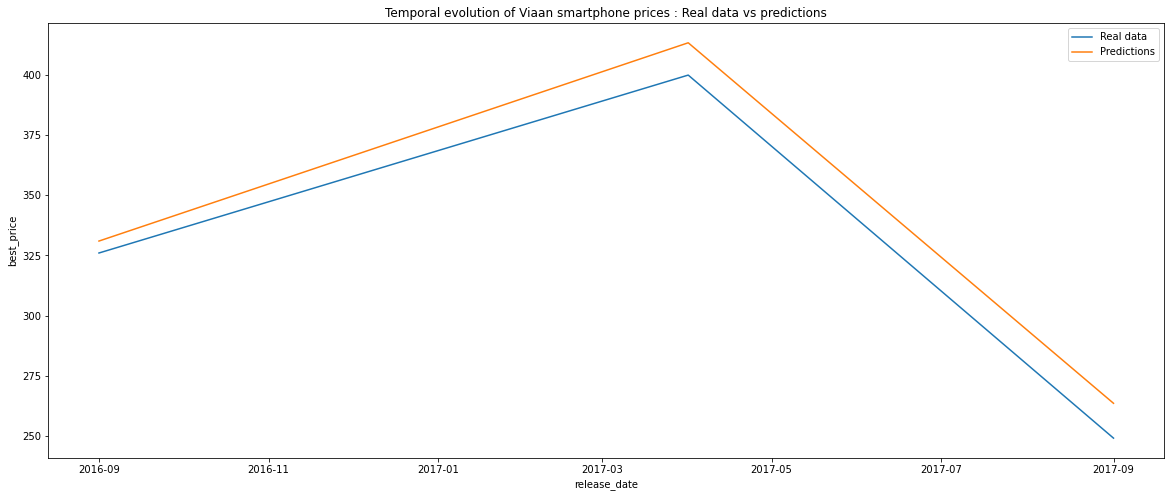

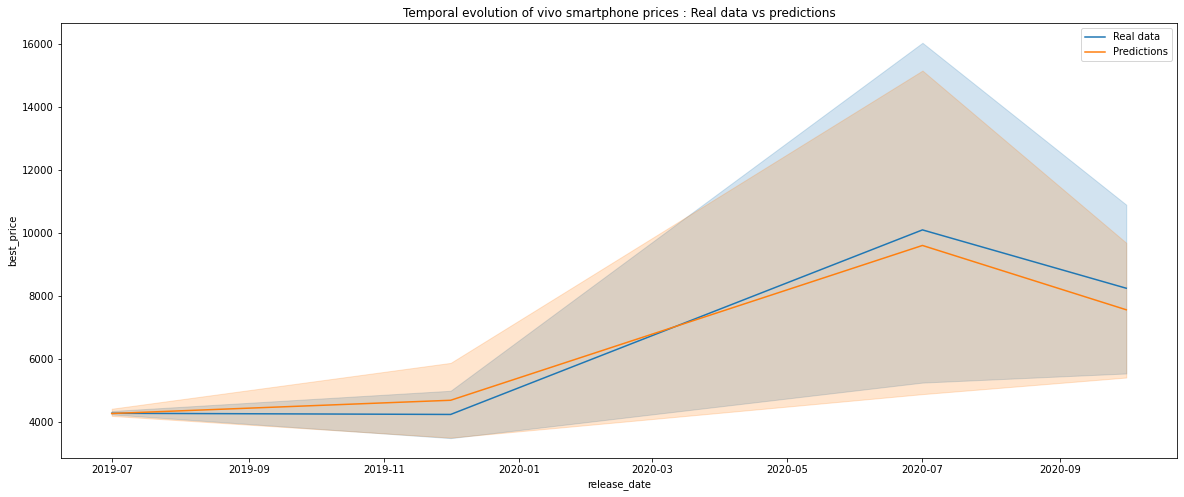

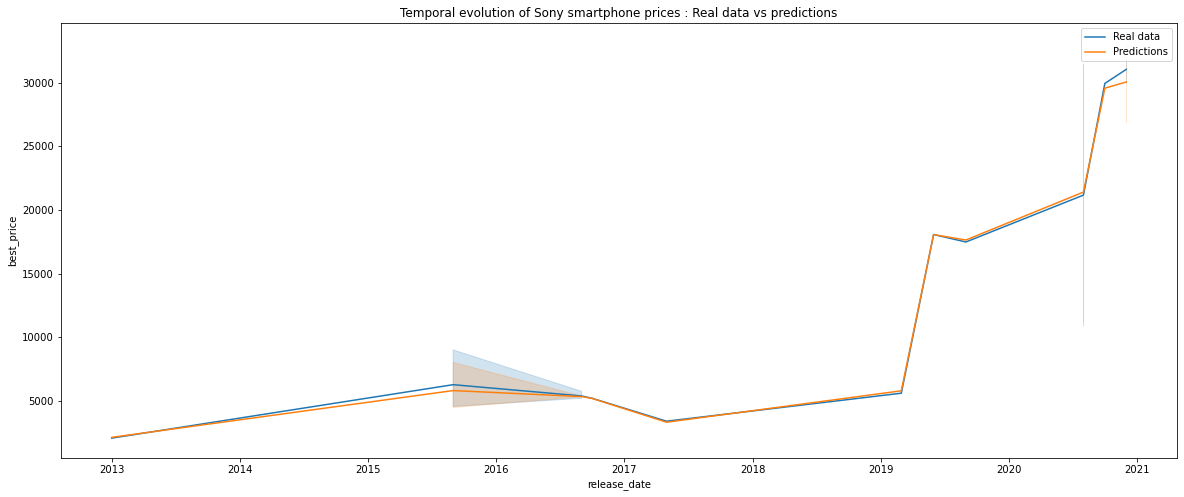

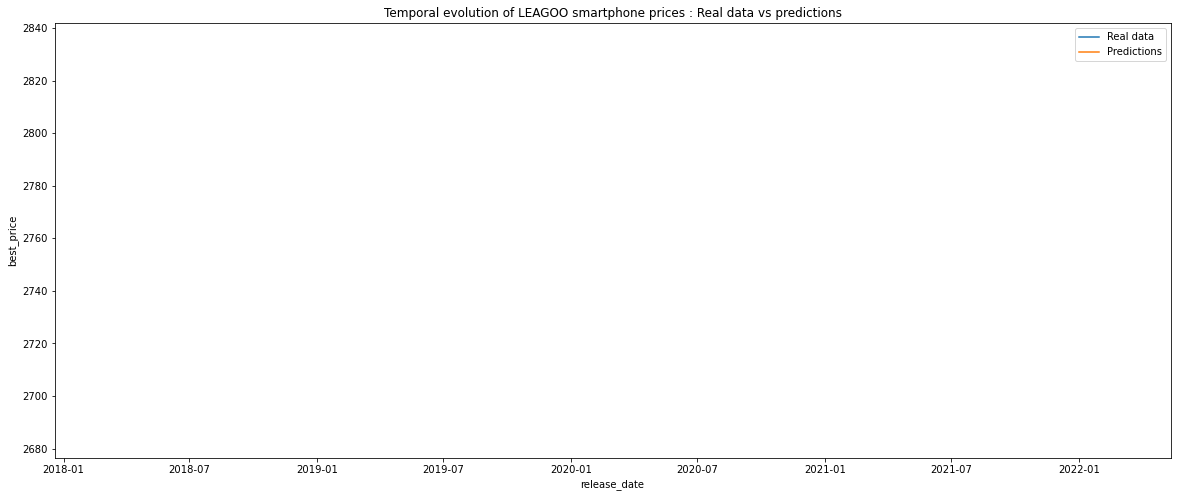

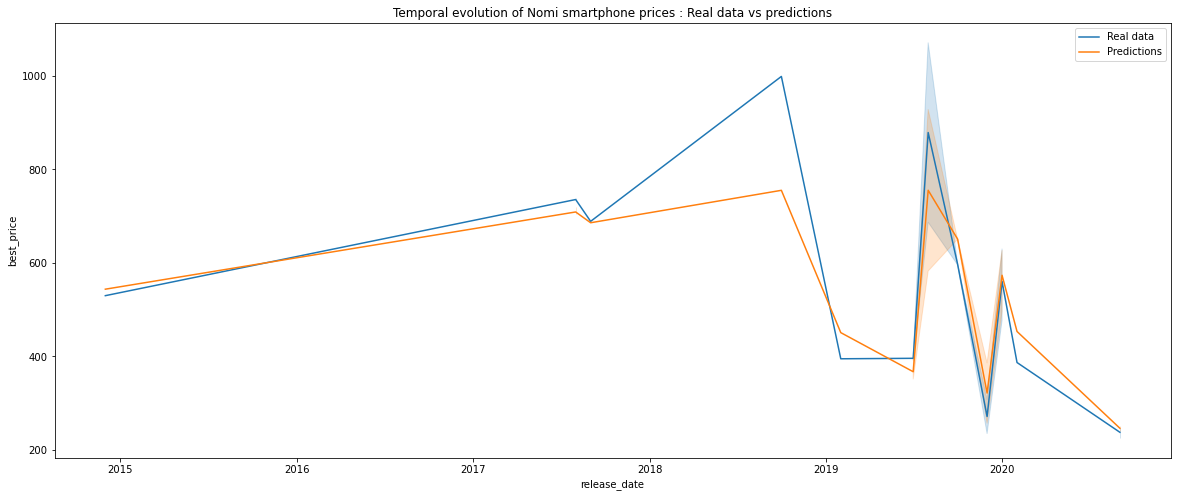

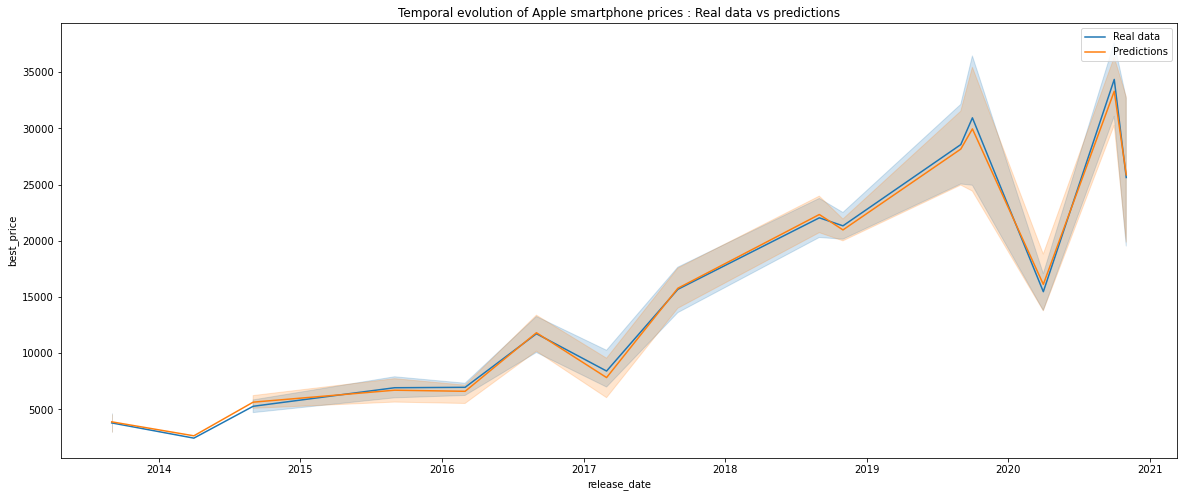

In [42]:
for brand in mobiles.brand_name.unique():
    plt.figure(figsize=(WIDTH, HEIGHT))
    
    query = f"brand_name=='{brand}'"
    
    sns.lineplot(data=mobiles.query(query), x='release_date', y=TARGET, label="Real data")
    
    sns.lineplot(x=mobiles.loc[X.index].query(query)['release_date'], y=np.exp(model.predict(X.iloc[mobiles.query(query).index,:])), label="Predictions")
    
    plt.title(f"Temporal evolution of {brand} smartphone prices : Real data vs predictions")
    plt.show()